# <font color='#BFD72F'>Contents</font> <a class="anchor" id="toc"></a>

* [1 - Data Understanding](#dataunderstanding)
 
<br>

## <font color='#BFD72F'>Imports</font>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import missingno as msno
from math import ceil

# data partition
from sklearn.model_selection import train_test_split,GridSearchCV
# data scaling
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler,FunctionTransformer,Binarizer,PowerTransformer,QuantileTransformer
#outliers
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
#Feature selection
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.feature_selection import RFE

# embedded methods
from sklearn.linear_model import LassoCV

# Model selection
from sklearn.model_selection import StratifiedKFold,RepeatedKFold,train_test_split, cross_val_score,GridSearchCV

#OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# Import models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, roc_curve
from sklearn import metrics


In [2]:
#creates a dataframe from the csv file "train"
df_orig = pd.read_csv("train.csv")

## <font color='#BFD72F'>Primary checks</font>

In [3]:
# Rows and columns?
df_orig.shape

(18055, 30)

In [4]:
# Sample of the data
df_orig.tail(5)

,RecordID,Competition,Edition,Athlete Id,Sex,Region,Education,Age group,Income,Disability,...,Cardiovascular training,Outdoor Workout,Squad training,Physiotherapy,Plyometric training,No coach,Sport-specific training,Other training,Past injuries,Outcome
18050,14070,World Championship,2021.0,628530.0,F,Central Asia,Middle school,0-35,Middle-Low,False,...,234.0,False,0.0,0.0,0.0,False,0.0,0.0,True,1
18051,11052,Federation League,2020.0,557751.0,M,Central Asia,High school,0-35,Low,False,...,12.0,False,0.0,25.0,0.0,False,34.0,3.0,False,0
18052,63665,Regional Tournament,2019.0,178963.0,M,Middle East,High school,0-35,Middle-High,True,...,55.0,False,0.0,0.0,0.0,False,2.0,0.0,False,1
18053,56900,National Cup,2022.0,634552.0,M,Oceania,High school,0-35,High,False,...,217.0,False,0.0,0.0,0.0,False,7.0,0.0,False,1
18054,58663,Continental Championship,2021.0,631655.0,M,Western Europe,University Degree,0-35,High,False,...,104.0,False,11.0,420.0,0.0,False,38.0,0.0,True,1


# <font color='#BFD72F'>Understanding the Data</font>



## <font color='#BFD72F'>Metadata</font>




This dataset contains 18055 rows of professional athletes characterization data with the following attributes:
<br><br>

**Registration Identidier**
* RecordID - ID of the registration of one athlete into an edition of a given competition

**Athlete Identifier**:
* Athlete Id - ID

**Enrollment attributes**
* Cancelled enrollment - Athlete cancelled the competition enrollment
* Late enrollment - Athlete enrolled in the competition belatedly
* Previous attempts - Number of previous competitions attempts
* Competition - Type of competition
* Edition - The year of the edition competition
* Athlete score - Athlete score from previous competitions

**Sociodemographic data**
* Age group - Athlete age range
* Sex - Athlete sex
* Education - Athlete education level
* Income - Athlete income level
* Region - Athlete region

**Training data**
* Cardiovascular training - Number of training sessions such as running, cycling, or swimming
* Sand training - Number of training sessions involving sand drills
* Sport-specific training - Number of training sessions that mimic competition scenarios
* Squad training - Number of training sessions that involve a group of athletes working together to prepare for competition
* Strength training - Number of training sessions using weightlifting and 
* Plyometric training - Number of training sessions involving explosive, high-intensity movements
* Outdoor workout - Training conducted outdoors in parks or forests
* Other training - Number of training sessions using non-standard approaches
bodyweight exercises
* Train bf competition - Number of pre-competition preparation sessions
* Mental preparation - Athlete has developed strategies for handling with stress and pressure
* Recover - Number of recovery sessions using stretching and massages techniques
* No coach - Athlete does not have a coach

**Physical condition data**
* Disability - Athlete with disability
* Past injuries - Athlete had sport injuries
* Physiotherapy - Number of physiotherapy sessions

**Others**
* Supplements - Number of nutritional supplements taken to aid performance

**Target**
* Outcome - Competition result

<br><br>

## <font color='#BFD72F'>Discriptive statistics</font>



In [5]:
# Get a table transposed
df_orig.describe().T

,count,mean,std,min,25%,50%,75%,max
RecordID,18055.0,55010.086846,26018.144281,10001.0,32344.5,54875.0,77466.5,99990.0
Edition,17959.0,2020.651317,1.209453,2019.0,2019.0,2021.0,2022.0,2022.0
Athlete Id,17965.0,703745.186863,550245.183498,8462.0,503183.0,588146.0,642591.0,2698588.0
Previous attempts,17968.0,0.154831,0.465858,0.0,0.0,0.0,0.0,6.0
Athlete score,17968.0,16.543856,36.215332,-30.0,0.0,0.0,30.0,140.0
Train bf competition,17959.0,266.042764,323.645815,0.0,80.0,171.0,335.0,5012.0
Strength training,17977.0,476.577516,699.269019,0.0,62.0,202.0,584.0,9438.0
Sand training,17976.0,3.405096,36.108953,0.0,0.0,0.0,0.0,2480.0
Recovery,17960.0,305.545490,622.102598,0.0,31.0,121.0,327.0,10483.0
Supplements,17965.0,133.868466,174.275943,0.0,24.0,66.0,181.0,4345.0


### Descriptive statistics interpretation (numerical)
* Athlete score -30 negative score - we should use absolute numbers so -30 becomes 30
* All Train types have 75%Q very distant from max value, skewed distributions? analyse distribuition visualy; maybe expressed in hours convert or treat as outlier
* Supplements equal to training distribution?
* physiotherapy - negative values, convert to absolut
* Pay attention to high standard deviation for some variables

In [6]:
# Step 7 - Categorical
df_orig.describe(include = ['O']).T

,count,unique,top,freq
Competition,17968,7,Local Match,4404
Sex,17962,2,M,9878
Region,17953,13,North America,2001
Education,17960,5,High school,8059
Age group,17952,4,0-35,12470
Income,17965,5,High,5395
Disability,17966,2,False,16298
Late enrollment,17969,2,False,17830
Cancelled enrollment,17967,2,False,14686
Mental preparation,17978,3,FALSE,16519


### Descriptive Statistics interpretation (categorical)
* Competition - Categorical translate to numerical - has order - Label Encoding
* Sex - Convert to numerical - boolean
* Region - Too many categories - reduce category number maybe by continent, check distribution to not introduce inbalance - connvert to numerical with one-hot encoding dummie variables
* Age group - convert to numerical - has order - Label Encoding
* Income - convert to numerical - has order - Label Encoding
* Diability - boolean
* Late Enrollement - boolean
* Cancelled Enrollment - boolean - this one when true, outcome is always 0 so we should use this variable to split the data and only use data to train model with
* Mental Preparation - should be a boolean but has 3 distinct values, possible problem, check later with value counts
* Outdoor Workout - boolean
* No Coach - boolean
* Past Injuries - boolean


## Data types analysis
In Pre-processing we should convert datatypes accordingly. 
* Check boolean datatypes as object ou int64
* float64 that should be int
...

In [7]:
# Step 8
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18055 entries, 0 to 18054
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   RecordID                 18055 non-null  int64  
 1   Competition              17968 non-null  object 
 2   Edition                  17959 non-null  float64
 3   Athlete Id               17965 non-null  float64
 4   Sex                      17962 non-null  object 
 5   Region                   17953 non-null  object 
 6   Education                17960 non-null  object 
 7   Age group                17952 non-null  object 
 8   Income                   17965 non-null  object 
 9   Disability               17966 non-null  object 
 10  Previous attempts        17968 non-null  float64
 11  Late enrollment          17969 non-null  object 
 12  Cancelled enrollment     17967 non-null  object 
 13  Athlete score            17968 non-null  float64
 14  Mental preparation    

##Missing Values

In [8]:
## Count of missing values - 2517
df_orig.isna().sum()

RecordID                     0
Competition                 87
Edition                     96
Athlete Id                  90
Sex                         93
Region                     102
Education                   95
Age group                  103
Income                      90
Disability                  89
Previous attempts           87
Late enrollment             86
Cancelled enrollment        88
Athlete score               87
Mental preparation          77
Train bf competition        96
Strength training           78
Sand training               79
Recovery                    95
Supplements                 90
Cardiovascular training     94
Outdoor Workout             84
Squad training              89
Physiotherapy               90
Plyometric training         66
No coach                    84
Sport-specific training     96
Other training             101
Past injuries              105
Outcome                      0
dtype: int64


Inbalanced: avaliar a distribuição
* Education - 
* Age Group - 
* Disability
* Late Enrollment
* Cancelled enrollement
* Mental preparation
*

In [9]:
#number of rows with missing values 2364 rows of 18055 - 13%
len(df_orig) - len(df_orig.dropna())

2364

In [10]:
# Find Records with 2 or more missing values - found 148 rows from 18055 that represent 0.82% maybe should consider to drop this rows, this is a indicator of poor data quality depending on the features
df_orig[df_orig.isnull().sum(axis=1) > 1]


,RecordID,Competition,Edition,Athlete Id,Sex,Region,Education,Age group,Income,Disability,...,Cardiovascular training,Outdoor Workout,Squad training,Physiotherapy,Plyometric training,No coach,Sport-specific training,Other training,Past injuries,Outcome
18,33088,Local Match,2021.0,2074627.0,M,North America,Middle school,0-35,Middle,False,...,651.0,False,0.0,1.0,0.0,False,22.0,NaN,True,1
57,11836,Local Match,2020.0,NaN,M,North America,University Degree,35-55,Low,False,...,936.0,False,0.0,97.0,34.0,False,NaN,56.0,True,1
90,44849,Local Match,2022.0,644508.0,F,East Asia,Middle school,0-35,Middle,False,...,2253.0,True,5.0,1.0,0.0,False,19.0,1.0,True,1
245,71194,National Cup,2021.0,50263.0,M,Eastern Europe,University Degree,35-55,NaN,False,...,174.0,False,0.0,0.0,NaN,False,3.0,0.0,False,0
309,44312,National Cup,2022.0,466360.0,M,NaN,University Degree,35-55,Middle-Low,False,...,425.0,False,0.0,0.0,0.0,False,8.0,NaN,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17589,98040,NaN,2021.0,631884.0,F,East Asia,High school,35-55,Middle,False,...,611.0,False,5.0,33.0,12.0,False,25.0,0.0,True,1
17760,88181,Local Match,NaN,680014.0,M,Middle East,High school,0-35,Middle,False,...,493.0,True,0.0,30.0,20.0,False,29.0,18.0,True,1
17805,11197,NaN,2022.0,NaN,F,Middle East,Middle school,0-35,High,False,...,126.0,False,0.0,0.0,0.0,False,1.0,0.0,True,0
17818,78321,Regional Tournament,2019.0,555614.0,F,Central Asia,Middle school,35-55,High,False,...,NaN,False,0.0,0.0,0.0,False,33.0,0.0,False,1


In [11]:
#obtain the percentage of missing values for each variable: percentage varies between 0.582% to 0.366%
df_orig.isna().sum().sort_values(ascending=False)/len(df_orig)*100

Past injuries              0.581556
Age group                  0.570479
Region                     0.564940
Other training             0.559402
Sport-specific training    0.531709
Train bf competition       0.531709
Edition                    0.531709
Education                  0.526170
Recovery                   0.526170
Cardiovascular training    0.520631
Sex                        0.515093
Athlete Id                 0.498477
Supplements                0.498477
Physiotherapy              0.498477
Income                     0.498477
Disability                 0.492938
Squad training             0.492938
Cancelled enrollment       0.487400
Athlete score              0.481861
Previous attempts          0.481861
Competition                0.481861
Late enrollment            0.476322
No coach                   0.465245
Outdoor Workout            0.465245
Sand training              0.437552
Strength training          0.432013
Mental preparation         0.426475
Plyometric training        0

### <font color='#BFD72F'>Duplicated Rows</font>

In [12]:
df_orig.columns

Index(['RecordID', 'Competition', 'Edition', 'Athlete Id', 'Sex', 'Region',
       'Education', 'Age group', 'Income', 'Disability', 'Previous attempts',
       'Late enrollment', 'Cancelled enrollment', 'Athlete score',
       'Mental preparation', 'Train bf competition', 'Strength training',
       'Sand training', 'Recovery', 'Supplements', 'Cardiovascular training',
       'Outdoor Workout', 'Squad training', 'Physiotherapy',
       'Plyometric training', 'No coach', 'Sport-specific training',
       'Other training', 'Past injuries', 'Outcome'],
      dtype='object')

In [13]:
features_to_find_duplicated = ['Competition', 'Edition', 'Sex', 'Region',
       'Education', 'Age group', 'Income', 'Disability', 'Previous attempts',
       'Late enrollment', 'Cancelled enrollment', 'Athlete score',
       'Mental preparation', 'Train bf competition', 'Strength training',
       'Sand training', 'Recovery', 'Supplements', 'Cardiovascular training',
       'Outdoor Workout', 'Squad training', 'Physiotherapy',
       'Plyometric training', 'No coach', 'Sport-specific training',
       'Other training', 'Past injuries']

In [14]:
df_orig[features_to_find_duplicated].duplicated().sum()

0

No duplicated rows

## <font color='#BFD72F'>Univariate analysis</font>

### <font color='#BFD72F'>Feature Values Analysis</font>

In [15]:
df_orig.columns

Index(['RecordID', 'Competition', 'Edition', 'Athlete Id', 'Sex', 'Region',
       'Education', 'Age group', 'Income', 'Disability', 'Previous attempts',
       'Late enrollment', 'Cancelled enrollment', 'Athlete score',
       'Mental preparation', 'Train bf competition', 'Strength training',
       'Sand training', 'Recovery', 'Supplements', 'Cardiovascular training',
       'Outdoor Workout', 'Squad training', 'Physiotherapy',
       'Plyometric training', 'No coach', 'Sport-specific training',
       'Other training', 'Past injuries', 'Outcome'],
      dtype='object')

In [16]:
#check for RecordID integrity
print("RecordId------------------")
print("Shape:", df_orig.shape)
print("Unique values count:", df_orig['RecordID'].nunique())
print("Missings:",df_orig['RecordID'].isna().sum())

#Check for Competition values
print("\nCompetition------------------")
print("Unique values count:", df_orig['Competition'].nunique())
print("Missings:",df_orig['Competition'].isna().sum())
print(df_orig['Competition'].value_counts())




RecordId------------------
Shape: (18055, 30)
Unique values count: 18055
Missings: 0

Competition------------------
Unique values count: 7
Missings: 87
Local Match                 4404
Regional Tournament         4225
Federation League           3417
National Cup                2373
Continental Championship    1597
World Championship          1454
Olympic Games                498
Name: Competition, dtype: int64


* RecordID 
  - This one is the index - OK
* Competition - Convert to numerical according to the importance of the competition
  * 1 - Local Match
  * 2 - Federation League
  * 3 - National Cup
  * 4 - Continental Cup
  * 5 - World Championship
  * 6 - Olympic Games

In [17]:
df_orig['Edition'].value_counts()

2022.0    6213
2019.0    4882
2021.0    4153
2020.0    2711
Name: Edition, dtype: int64

**Edition** as values ranging from 2019 to 2022. Mode in 2022

In [18]:
df_orig['Sex'].value_counts()

M    9878
F    8084
Name: Sex, dtype: int64

**Sex** can be considered ballanced with 55% men and 45% women

In [19]:
# ok ou reduzir o n.º de categorias tipo america, europa, asia, africa e oceania
df_orig['Region'].value_counts()

North America      2001
Western Europe     1855
East Asia          1767
South America      1689
Northern Africa    1495
Eastern Europe     1385
Middle East        1374
Central Asia       1275
Central America    1192
Oceania            1169
Southern Europe    1053
South Asia          993
Southern Africa     705
Name: Region, dtype: int64

**Region** as 13 categories that can be reduced maybe to continents - check balancing after convertion, after should be created dummy numerical features since there is not a specific order of importance for Region 

In [20]:
#este deve ser convertido em numérico 
df_orig['Education'].value_counts()

High school          8059
Middle school        6755
University Degree    2807
Post Graduate         185
Elementary school     154
Name: Education, dtype: int64

**Education** as 5 classes with order of instruction from Elementary School to Post Graduate - convert to numerical accordingly

In [21]:
df_orig['Age group'].value_counts()

0-35     12470
35-55     5325
55<=       134
0           23
Name: Age group, dtype: int64

**Age Group** as 3 classes the class labeled '0' should be converted to '0-35'

In [22]:
# converter em numérico com ordem específica
df_orig['Income'].value_counts()


High           5395
Middle-Low     3844
Middle         3548
Low            3541
Middle-High    1637
Name: Income, dtype: int64

**Income** also can be converted to numerical with order from Low to High Income

In [23]:

df_orig['Disability'].value_counts()


False    16298
True      1668
Name: Disability, dtype: int64

**Disability** is unballanced

In [24]:
#é float trocar para int
df_orig['Previous attempts'].value_counts()

0.0    15773
1.0     1742
2.0      356
3.0       73
4.0       14
5.0        7
6.0        3
Name: Previous attempts, dtype: int64

In [25]:
# é object, trocar para boolean?
df_orig['Late enrollment'].value_counts()

False    17830
True       139
Name: Late enrollment, dtype: int64

**Late enrollment** unballanced - maybe disconsider check correlations to confirm

In [26]:
# é object, trocar para boolean?
df_orig['Cancelled enrollment'].value_counts()

False    14686
True      3281
Name: Cancelled enrollment, dtype: int64

**Cancelled Enrollment** check correlations 

In [27]:
# muitos valores negativos, será possível?
# ver a distribuição os valores parecem ser de 30 em 30
df_orig['Athlete score'].value_counts().sort_index()


-30.0     2186
-20.0       11
-15.0       19
-10.0        4
-5.0         2
 0.0      9608
 5.0         1
 10.0       67
 15.0       51
 20.0       19
 25.0        3
 30.0     1687
 35.0        2
 40.0       17
 45.0        7
 50.0        8
 55.0        4
 60.0     3239
 70.0       22
 75.0       16
 80.0        4
 85.0        3
 90.0      376
 100.0       7
 105.0       6
 110.0       4
 120.0     368
 140.0     227
Name: Athlete score, dtype: int64

**Athelete Score** - Negative values - consider in absolute values - Convert all intermediate values to classes 0; 30; 60; 90; 120 - 5 classes

In [28]:
# corrigir os FASE > FALSE - será relevante esta variável?
df_orig['Mental preparation'].value_counts()

FALSE    16519
TRUE      1360
FASE        99
Name: Mental preparation, dtype: int64

**Mental Preparation** convert values FASE to FALSE, unballlanced - check correlations, maybe ignore this feature

In [29]:
# este está atolado de ouliers o quartil 75 é 3xx tem valores 
# correlacionar com o outcome
df_orig['Train bf competition'].value_counts().sort_values(ascending=False)

59.0      79
30.0      74
49.0      74
92.0      73
60.0      73
          ..
1030.0     1
2211.0     1
892.0      1
848.0      1
722.0      1
Name: Train bf competition, Length: 1371, dtype: int64

Check visual representation, univariate and bivariate, descriptive statistics 

In [30]:
#Outliers
df_orig['Strength training'].value_counts()#.sort_index

0.0       148
13.0      107
14.0       98
6.0        95
5.0        94
         ... 
2256.0      1
2673.0      1
2232.0      1
2224.0      1
2308.0      1
Name: Strength training, Length: 2431, dtype: int64

Check visual representation, univariate and bivariate, descriptive statistics 

In [31]:
#Number of training sessions involving sand drills
df_orig['Sand training'].value_counts()

0.0       13870
1.0        1148
2.0         648
3.0         348
4.0         285
          ...  
577.0         1
105.0         1
668.0         1
201.0         1
1213.0        1
Name: Sand training, Length: 161, dtype: int64

Check visual representation, univariate and bivariate, descriptive statistics 

In [32]:
#Number of recovery sessions using stretching and massages techniques
# colocar em intervalos?
df_orig['Recovery'].value_counts()

0.0       1104
2.0        192
3.0        184
1.0        177
4.0        159
          ... 
1113.0       1
2220.0       1
4883.0       1
1540.0       1
2181.0       1
Name: Recovery, Length: 1789, dtype: int64

Check visual representation, univariate and bivariate, descriptive statistics 

In [33]:
# Number of nutritional supplements taken to aid performance
df_orig['Supplements'].value_counts()

11.0      211
8.0       208
12.0      207
15.0      199
14.0      194
         ... 
951.0       1
1114.0      1
795.0       1
623.0       1
1044.0      1
Name: Supplements, Length: 876, dtype: int64

Check visual representation, univariate and bivariate, descriptive statistics 

In [34]:
#Number of training sessions such as running, cycling, or swimming
df_orig['Cardiovascular training'].value_counts()

0.0       1564
1.0        570
2.0        392
3.0        303
4.0        291
          ... 
3145.0       1
1041.0       1
1587.0       1
3491.0       1
1872.0       1
Name: Cardiovascular training, Length: 1707, dtype: int64

Check visual representation, univariate and bivariate, descriptive statistics 

In [35]:
#Training conducted outdoors in parks or forests
df_orig['Outdoor Workout'].value_counts()

False    16777
True      1194
Name: Outdoor Workout, dtype: int64

**Outdoor Workout** unballenced, check correlations

In [36]:
# Number of training sessions that involve a group of athletes working together to prepare for competition
df_orig['Squad training'].value_counts()

0.0      10683
1.0       1479
2.0        957
3.0        631
4.0        533
         ...  
116.0        1
99.0         1
143.0        1
172.0        1
140.0        1
Name: Squad training, Length: 130, dtype: int64

In [37]:
#Number of physiotherapy sessions
df_orig['Physiotherapy'].value_counts()

0.0      10750
1.0        307
2.0        230
3.0        194
4.0        161
         ...  
842.0        1
492.0        1
657.0        1
604.0        1
420.0        1
Name: Physiotherapy, Length: 560, dtype: int64

Check visual representation, univariate and bivariate, descriptive statistics

In [38]:
#Number of training sessions involving explosive, high-intensity movements
df_orig['Plyometric training'].value_counts()

0.0     14838
3.0       428
9.0       243
6.0       187
4.0       165
        ...  
58.0        1
65.0        1
59.0        1
60.0        1
55.0        1
Name: Plyometric training, Length: 63, dtype: int64

Check visual representation, univariate and bivariate, descriptive statistics

In [39]:
# deitar fora a variável
df_orig['No coach'].value_counts()

False    17969
True         2
Name: No coach, dtype: int64

**No coach** ignore feature

In [40]:
#Number of training sessions that mimic competition scenarios
df_orig['Sport-specific training'].value_counts()

0.0      2483
1.0      1043
2.0       940
3.0       856
4.0       720
         ... 
299.0       1
317.0       1
197.0       1
222.0       1
279.0       1
Name: Sport-specific training, Length: 260, dtype: int64

Check visual representation, univariate and bivariate, descriptive statistics

In [41]:
#Number of training sessions using non-standard approaches
df_orig['Other training'].value_counts()

0.0      13555
1.0        643
2.0        408
3.0        335
4.0        254
         ...  
153.0        1
108.0        1
240.0        1
126.0        1
119.0        1
Name: Other training, Length: 136, dtype: int64

Check visual representation, univariate and bivariate, descriptive statistics

In [42]:
df_orig['Past injuries'].value_counts()

True     9872
False    8078
Name: Past injuries, dtype: int64

In [43]:
df_orig['Outcome'].value_counts()

1    10766
0     7289
Name: Outcome, dtype: int64

**Outcome** The target variable

### <font color='#BFD72F'>Visualizations</font>

#### <font color='#BFD72F'>Visualization functions</font>

In [44]:
## Define a function that plots multiple histograms

def plot_multiple_histograms(data, feats, title="Numeric Variables' Histograms"):

    # Prepare figure. Create individual axes where each histogram will be placed
    fig, axes = plt.subplots(3, ceil(len(feats) / 3), figsize=(20, 10))

    # Plot data
    # Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
    for ax, feat in zip(axes.flatten(), feats): # Notice the zip() function and flatten() method
      ax.hist(data[feat])
      ax.set_title(feat)

    # Layout
    # Add a centered title to the figure:
    plt.suptitle(title)

    plt.show()

    return


## Define a function that plots multiple histograms (categorical)

def plot_categorical_frequencies(data, feats, 
                             title="Categorical Variables' Frequencies"):
  
    # Prepare figure. Create individual axes where each histogram will be placed
    fig, axes = plt.subplots(6, ceil(len(feats) / 6), figsize=(20, 20))

    # Plot data
    # Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
    for ax, feat in zip(axes.flatten(), feats): # Notice the zip() function and flatten() method
        sns.countplot(y=data[feat].astype(object), ax=ax, color='#007acc',order=data[feat].value_counts(ascending=False).index)

    # Layout
    # Add a centered title to the figure:
    plt.suptitle(title)


    plt.show()

    return


## Define a function that plots multiple box plots

def plot_multiple_boxplots(data, feats, title="Numeric Variables' Box Plots"):

    # Prepare figure. Create individual axes where each histogram will be placed
    fig, axes = plt.subplots(5, ceil(len(feats) / 5), figsize=(15, 25))

    # Plot data
    # Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
    for ax, feat in zip(axes.flatten(), feats): # Notice the zip() function and flatten() method
      sns.boxplot(x=data[feat], ax=ax)
      ax.set_title(feat)

    # Layout
    # Add a centered title to the figure:
    plt.suptitle(title)

    plt.show()

    return

In [45]:
df_orig.columns

Index(['RecordID', 'Competition', 'Edition', 'Athlete Id', 'Sex', 'Region',
       'Education', 'Age group', 'Income', 'Disability', 'Previous attempts',
       'Late enrollment', 'Cancelled enrollment', 'Athlete score',
       'Mental preparation', 'Train bf competition', 'Strength training',
       'Sand training', 'Recovery', 'Supplements', 'Cardiovascular training',
       'Outdoor Workout', 'Squad training', 'Physiotherapy',
       'Plyometric training', 'No coach', 'Sport-specific training',
       'Other training', 'Past injuries', 'Outcome'],
      dtype='object')

In [46]:
metric_features = ['Previous attempts','Athlete score','Train bf competition','Strength training','Sand training','Recovery','Supplements','Cardiovascular training','Squad training','Physiotherapy','Plyometric training','Sport-specific training','Other training']
# removed from metric_features 'Outcome'
metric_features_w = ['Edition','Athlete Id','Previous attempts','Athlete score','Train bf competition','Strength training','Sand training','Recovery','Supplements','Cardiovascular training','Squad training','Physiotherapy','Plyometric training','Sport-specific training','Other training', 'Outcome']
#df_fs[metric_features].
no_metric_features=['Edition', 'Competition','Sex','Region','Education','Age group','Income','Disability','Late enrollment','Cancelled enrollment','Mental preparation','Outdoor Workout','Past injuries']
# removed from no_metric_features 'No coach'
all_features = ['Edition','Athlete Id','Previous attempts','Athlete score','Train bf competition','Strength training','Sand training','Recovery','Supplements','Cardiovascular training','Squad training','Physiotherapy','Plyometric training','Sport-specific training','Other training','Outcome', 'Competition','Sex','Region','Education','Age group','Income','Disability','Late enrollment','Cancelled enrollment','Mental preparation','Outdoor Workout','No coach','Past injuries']



#### <font color='#BFD72F'>Histograms - Numerical</font>

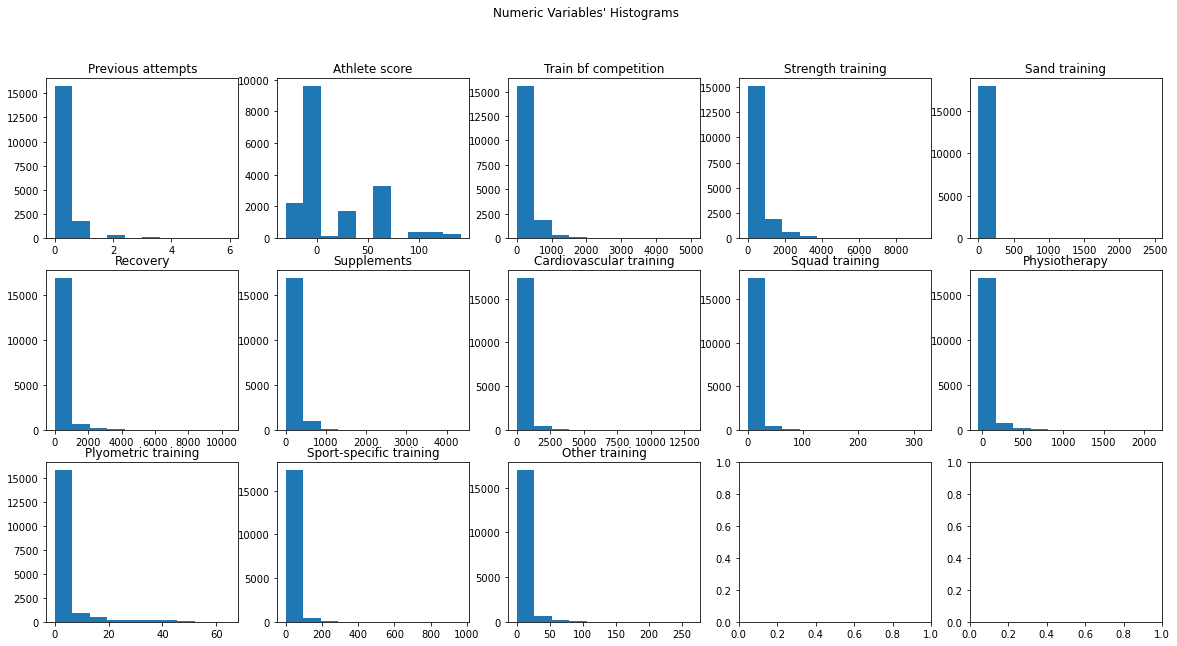

In [47]:
plot_multiple_histograms(df_orig,metric_features)

#### <font color='#BFD72F'>Histograms - Categorical</font>

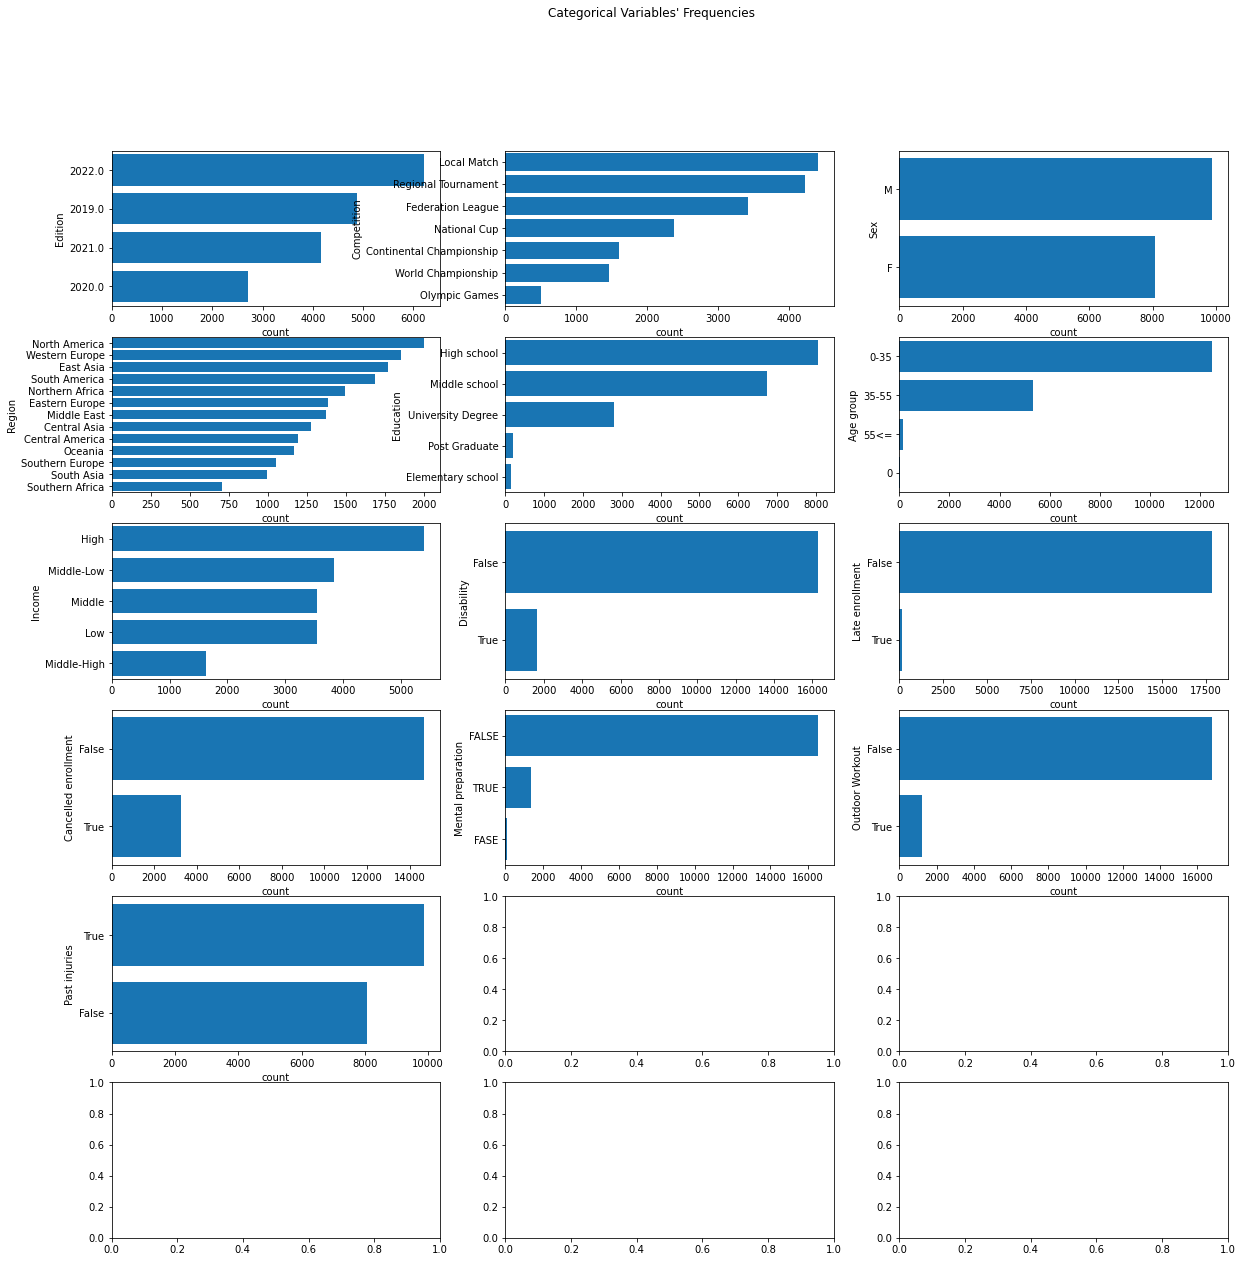

In [48]:
plot_categorical_frequencies(df_orig,no_metric_features)

#### <font color='#BFD72F'>Boxplots</font>
All distributions are skewed so we should identify outliers after applying log

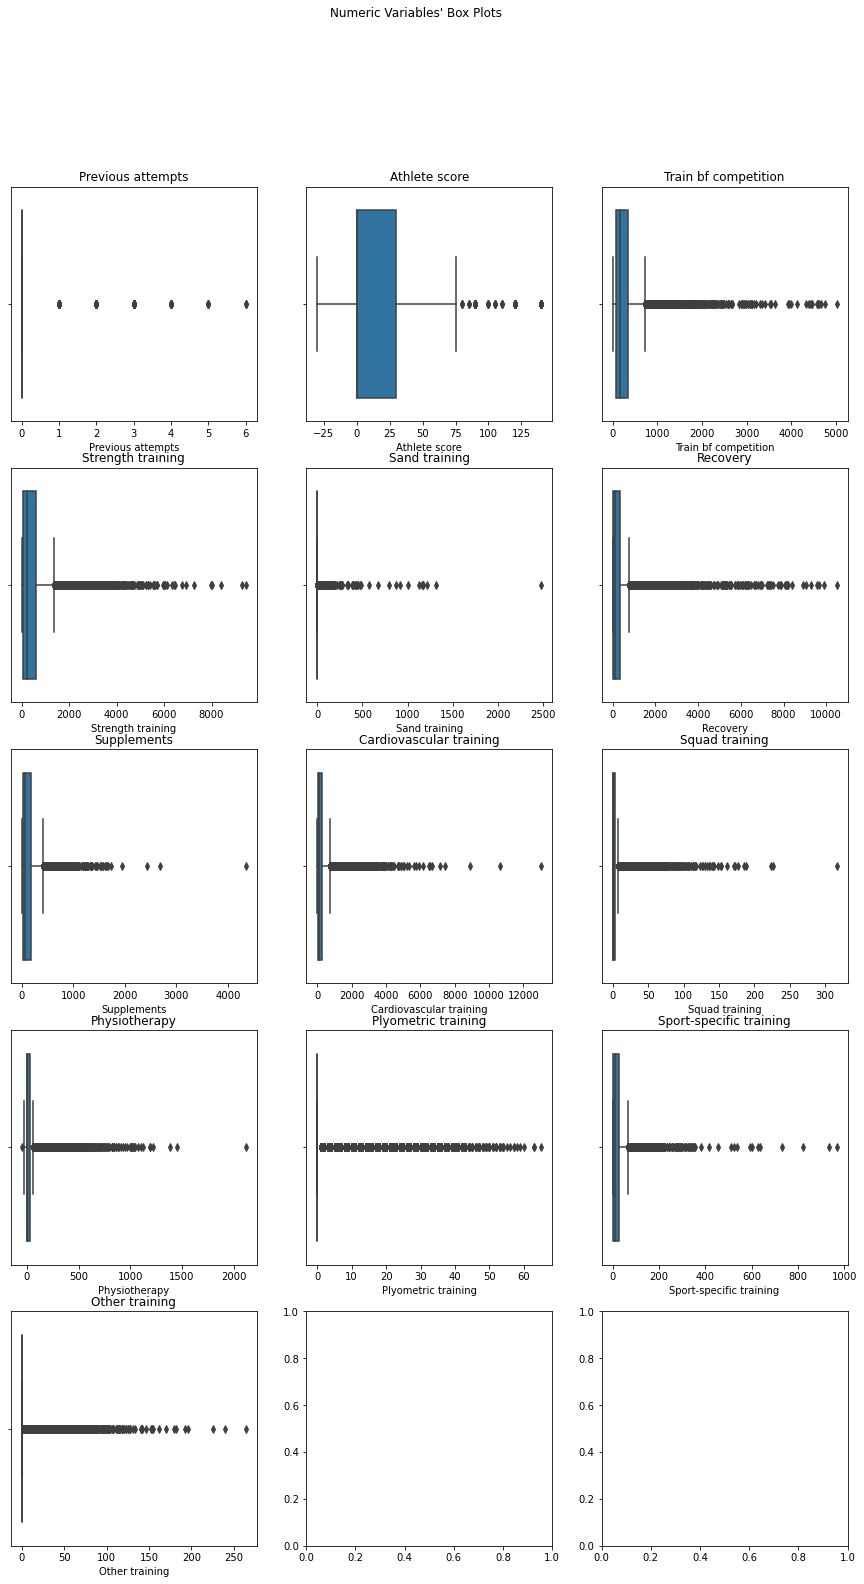

In [49]:
plot_multiple_boxplots(df_orig, metric_features)

#### <font color='#BFD72F'>Boxplots (Log)</font>
All distributions are skewed so we should identify outliers after applying log

In [50]:
# Transform all negative values in positive, add 1 (log(0)) then apply log
df_log = df_orig[metric_features].abs().apply(lambda x: x+1).apply(lambda x: np.log(x))

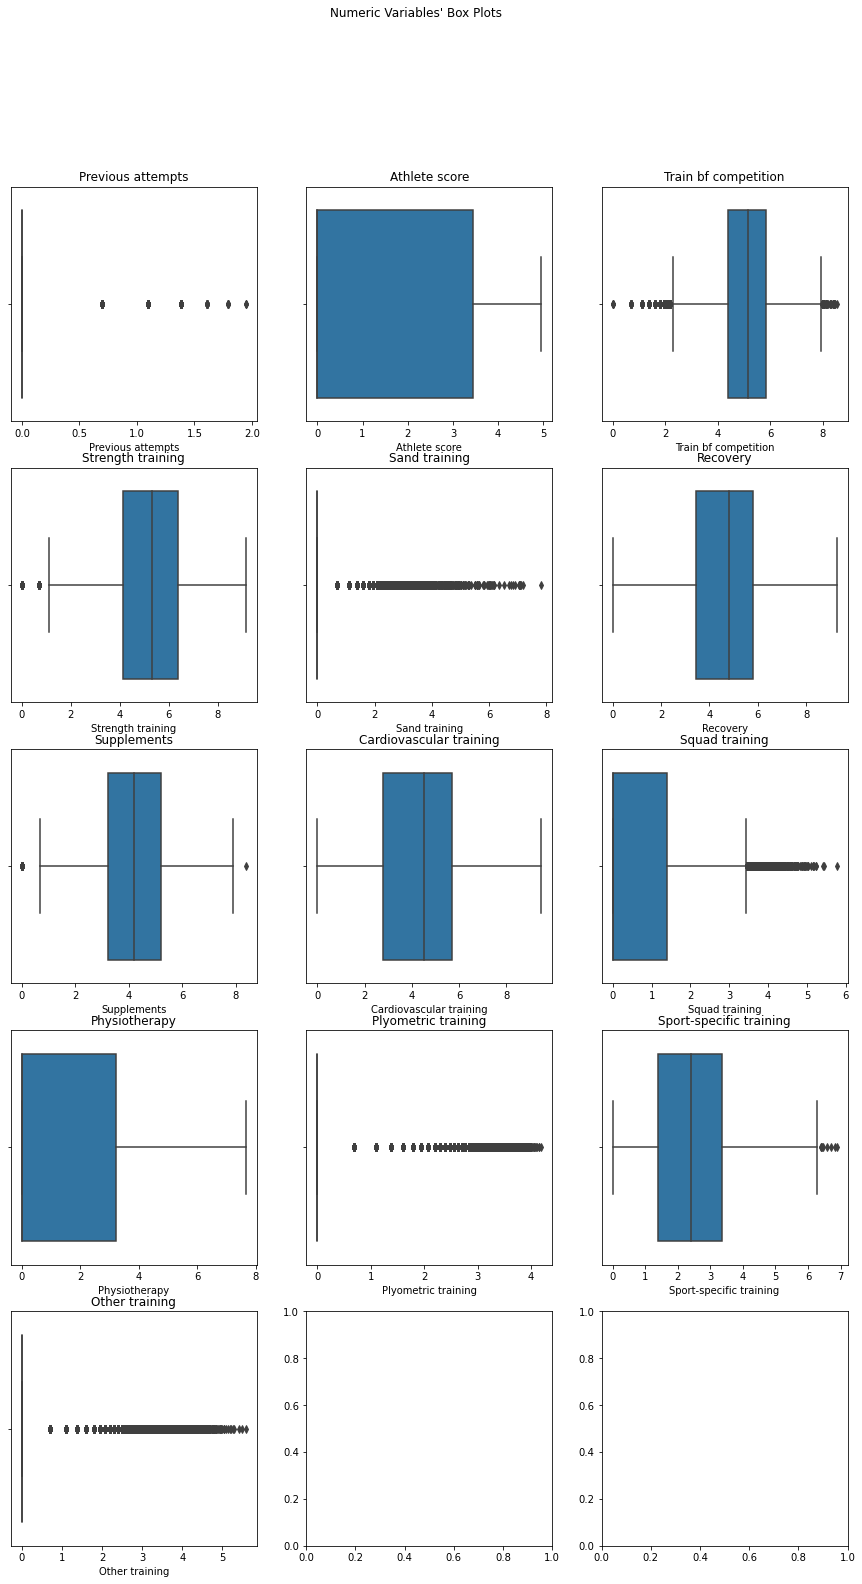

In [51]:
plot_multiple_boxplots(df_log, metric_features)

Maybe it's a good idea to analyse case by case considering the meaning of the variable when handling outliers!

## <font color='#BFD72F'>Bivariate analysis</font>


### <font color='#BFD72F'>Correlation Heatmap</font>

To better understant correlations we do some pre-processing taks that also are done in 'Data pre-processing' section

In [52]:
#complete dictionary for cleaning up the num_doors and num_cylinders columns:
cleanup_nums = {"Income":     {"Low": 1, "Middle-Low": 2, "Middle": 3, "Middle-High": 4, "High": 5},
                "Age group": {"0-35": 1, "35-55": 2, "55<=": 3},
                "Education": {"Elementary school": 1, "Middle school": 2, "High school": 3, "University Degree": 4, "Post Graduate": 5},
                "Region": {"North America": "America", "South America": "America",  "Central America": "America", "Western Europe": "Europe", "Eastern Europe": "Europe",  "Southern Europe": "Europe", "East Asia": "Asia", "Central Asia": "Asia",  "South Asia": "Asia", "Northern Africa": "Africa",  "Southern Africa": "Africa"},
                "Competition": {"Local Match": 1, "Regional Tournament": 2, "Federation League": 3, "National Cup": 4, "Continental Championship": 5, "World Championship": 6, "Olympic Games": 7},
                 "Sex":     {"M": 0, "F": 1},                              
                "Past injuries":     {False: 0, True: 1},
                "Outdoor Workout":     {False: 0, True: 1},
                "Mental preparation":     {"FALSE": 0, "TRUE": 1},
                "Cancelled enrollment":     {False: 0, True: 1},
                "Late enrollment":     {False: 0, True: 1},
                "Disability":     {False: 0, True: 1}}

In [53]:
#To convert the columns to numbers using replace |, inplace = True
df_cvtd = df_orig.copy()

df_cvtd  = df_cvtd.replace(cleanup_nums)

df_cvtd.head()

,RecordID,Competition,Edition,Athlete Id,Sex,Region,Education,Age group,Income,Disability,...,Cardiovascular training,Outdoor Workout,Squad training,Physiotherapy,Plyometric training,No coach,Sport-specific training,Other training,Past injuries,Outcome
0,44141,3.0,2019.0,549337.0,0.0,Africa,3.0,1,3.0,0.0,...,0.0,0.0,7.0,0.0,0.0,False,1.0,0.0,0.0,0
1,78417,2.0,2021.0,631492.0,1.0,Oceania,4.0,1,1.0,0.0,...,118.0,0.0,0.0,0.0,0.0,False,65.0,0.0,0.0,1
2,63424,7.0,2022.0,2168833.0,0.0,Middle East,2.0,2,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,False,0.0,0.0,0.0,0
3,72391,4.0,2021.0,573153.0,0.0,Europe,2.0,1,1.0,0.0,...,55.0,0.0,0.0,0.0,0.0,False,3.0,0.0,0.0,0
4,46699,1.0,2019.0,606079.0,0.0,Europe,3.0,2,3.0,0.0,...,265.0,0.0,22.0,50.0,13.0,False,25.0,0.0,0.0,0


In [54]:
# Get one hot encoding of columns 'Region'
one_hot = pd.get_dummies(df_cvtd.Region, prefix='Region')

# Join the encoded df
df_cvtd = df_cvtd.join(one_hot)

# Drop column as it is now encoded
df_cvtd = df_cvtd.drop('Region',axis = 1)


In [55]:
df_cvtd

,RecordID,Competition,Edition,Athlete Id,Sex,Education,Age group,Income,Disability,Previous attempts,...,Sport-specific training,Other training,Past injuries,Outcome,Region_Africa,Region_America,Region_Asia,Region_Europe,Region_Middle East,Region_Oceania
0,44141,3.0,2019.0,549337.0,0.0,3.0,1,3.0,0.0,0.0,...,1.0,0.0,0.0,0,1,0,0,0,0,0
1,78417,2.0,2021.0,631492.0,1.0,4.0,1,1.0,0.0,0.0,...,65.0,0.0,0.0,1,0,0,0,0,0,1
2,63424,7.0,2022.0,2168833.0,0.0,2.0,2,3.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,1,0
3,72391,4.0,2021.0,573153.0,0.0,2.0,1,1.0,0.0,0.0,...,3.0,0.0,0.0,0,0,0,0,1,0,0
4,46699,1.0,2019.0,606079.0,0.0,3.0,2,3.0,0.0,0.0,...,25.0,0.0,0.0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18050,14070,6.0,2021.0,628530.0,1.0,2.0,1,2.0,0.0,0.0,...,0.0,0.0,1.0,1,0,0,1,0,0,0
18051,11052,3.0,2020.0,557751.0,0.0,3.0,1,1.0,0.0,0.0,...,34.0,3.0,0.0,0,0,0,1,0,0,0
18052,63665,2.0,2019.0,178963.0,0.0,3.0,1,4.0,1.0,0.0,...,2.0,0.0,0.0,1,0,0,0,0,1,0
18053,56900,4.0,2022.0,634552.0,0.0,3.0,1,5.0,0.0,0.0,...,7.0,0.0,0.0,1,0,0,0,0,0,1


In [56]:
# Data type casts
df_cvtd['Age group'] = pd.to_numeric(df_cvtd['Age group'], errors='coerce').astype('Int8')
df_cvtd['Mental preparation'] = pd.to_numeric(df_cvtd['Mental preparation'], errors='coerce').astype('Int8')
df_cvtd['No coach'] = pd.to_numeric(df_cvtd['No coach'], errors='coerce').astype('Int8')

In [57]:
df_cvtd.columns

Index(['RecordID', 'Competition', 'Edition', 'Athlete Id', 'Sex', 'Education',
       'Age group', 'Income', 'Disability', 'Previous attempts',
       'Late enrollment', 'Cancelled enrollment', 'Athlete score',
       'Mental preparation', 'Train bf competition', 'Strength training',
       'Sand training', 'Recovery', 'Supplements', 'Cardiovascular training',
       'Outdoor Workout', 'Squad training', 'Physiotherapy',
       'Plyometric training', 'No coach', 'Sport-specific training',
       'Other training', 'Past injuries', 'Outcome', 'Region_Africa',
       'Region_America', 'Region_Asia', 'Region_Europe', 'Region_Middle East',
       'Region_Oceania'],
      dtype='object')

In [58]:
#features for correlation heatmap
features_hm = ['Competition', 'Edition', 'Sex', 'Region_Africa',
       'Region_America', 'Region_Asia', 'Region_Europe', 'Region_Middle East',
       'Region_Oceania', 'Education', 'Age group', 'Income', 'Disability', 'Previous attempts',
       'Late enrollment', 'Cancelled enrollment', 'Athlete score',
       'Mental preparation', 'Train bf competition', 'Strength training',
       'Sand training', 'Recovery', 'Supplements', 'Cardiovascular training',
       'Outdoor Workout', 'Squad training', 'Physiotherapy',
       'Plyometric training', 'No coach', 'Sport-specific training',
       'Other training', 'Past injuries', 'Outcome']

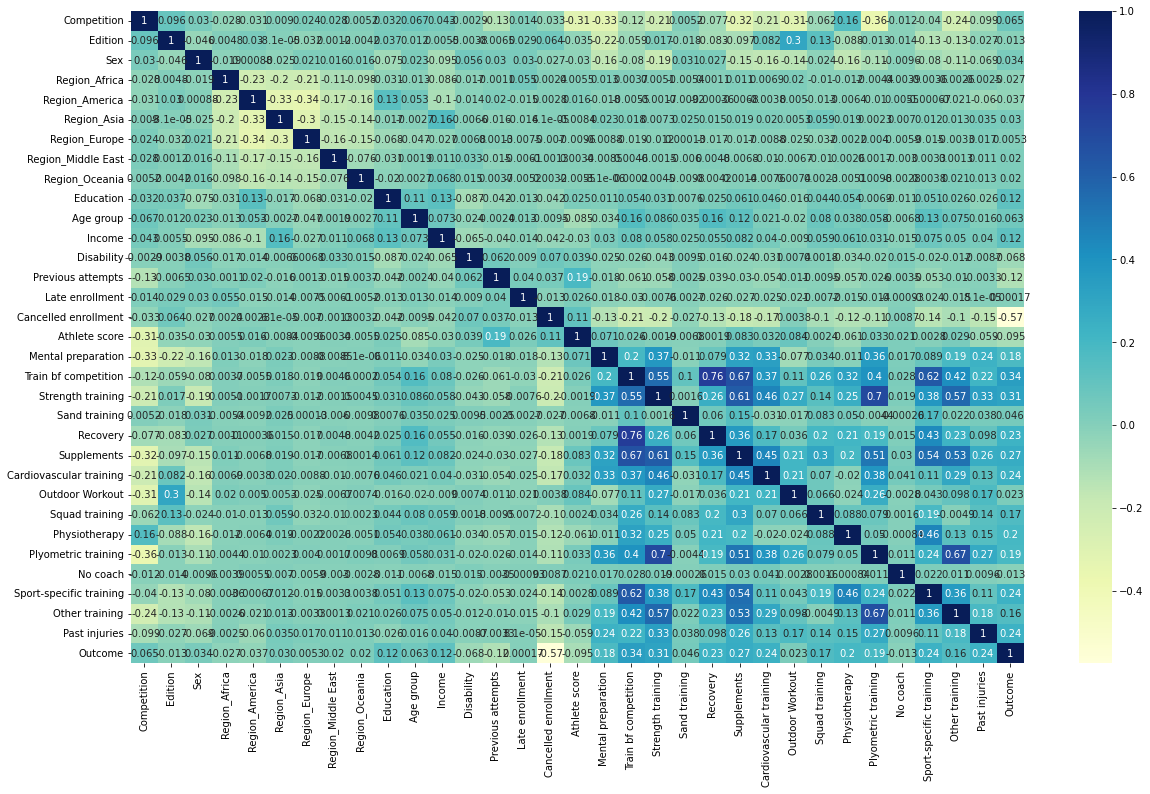

In [59]:
# plotting correlation heatmap
plt.figure(figsize=(20,12))

dataplot = sns.heatmap(df_cvtd[features_hm].corr(), cmap="YlGnBu", annot=True )

### <font color='#BFD72F'>Pairwise Relationship</font>

In [60]:
df_pairwise = df_cvtd.copy()

In [61]:
df_pairwise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18055 entries, 0 to 18054
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   RecordID                 18055 non-null  int64  
 1   Competition              17968 non-null  float64
 2   Edition                  17959 non-null  float64
 3   Athlete Id               17965 non-null  float64
 4   Sex                      17962 non-null  float64
 5   Education                17960 non-null  float64
 6   Age group                17952 non-null  Int8   
 7   Income                   17965 non-null  float64
 8   Disability               17966 non-null  float64
 9   Previous attempts        17968 non-null  float64
 10  Late enrollment          17969 non-null  float64
 11  Cancelled enrollment     17967 non-null  float64
 12  Athlete score            17968 non-null  float64
 13  Mental preparation       17879 non-null  Int8   
 14  Train bf competition  

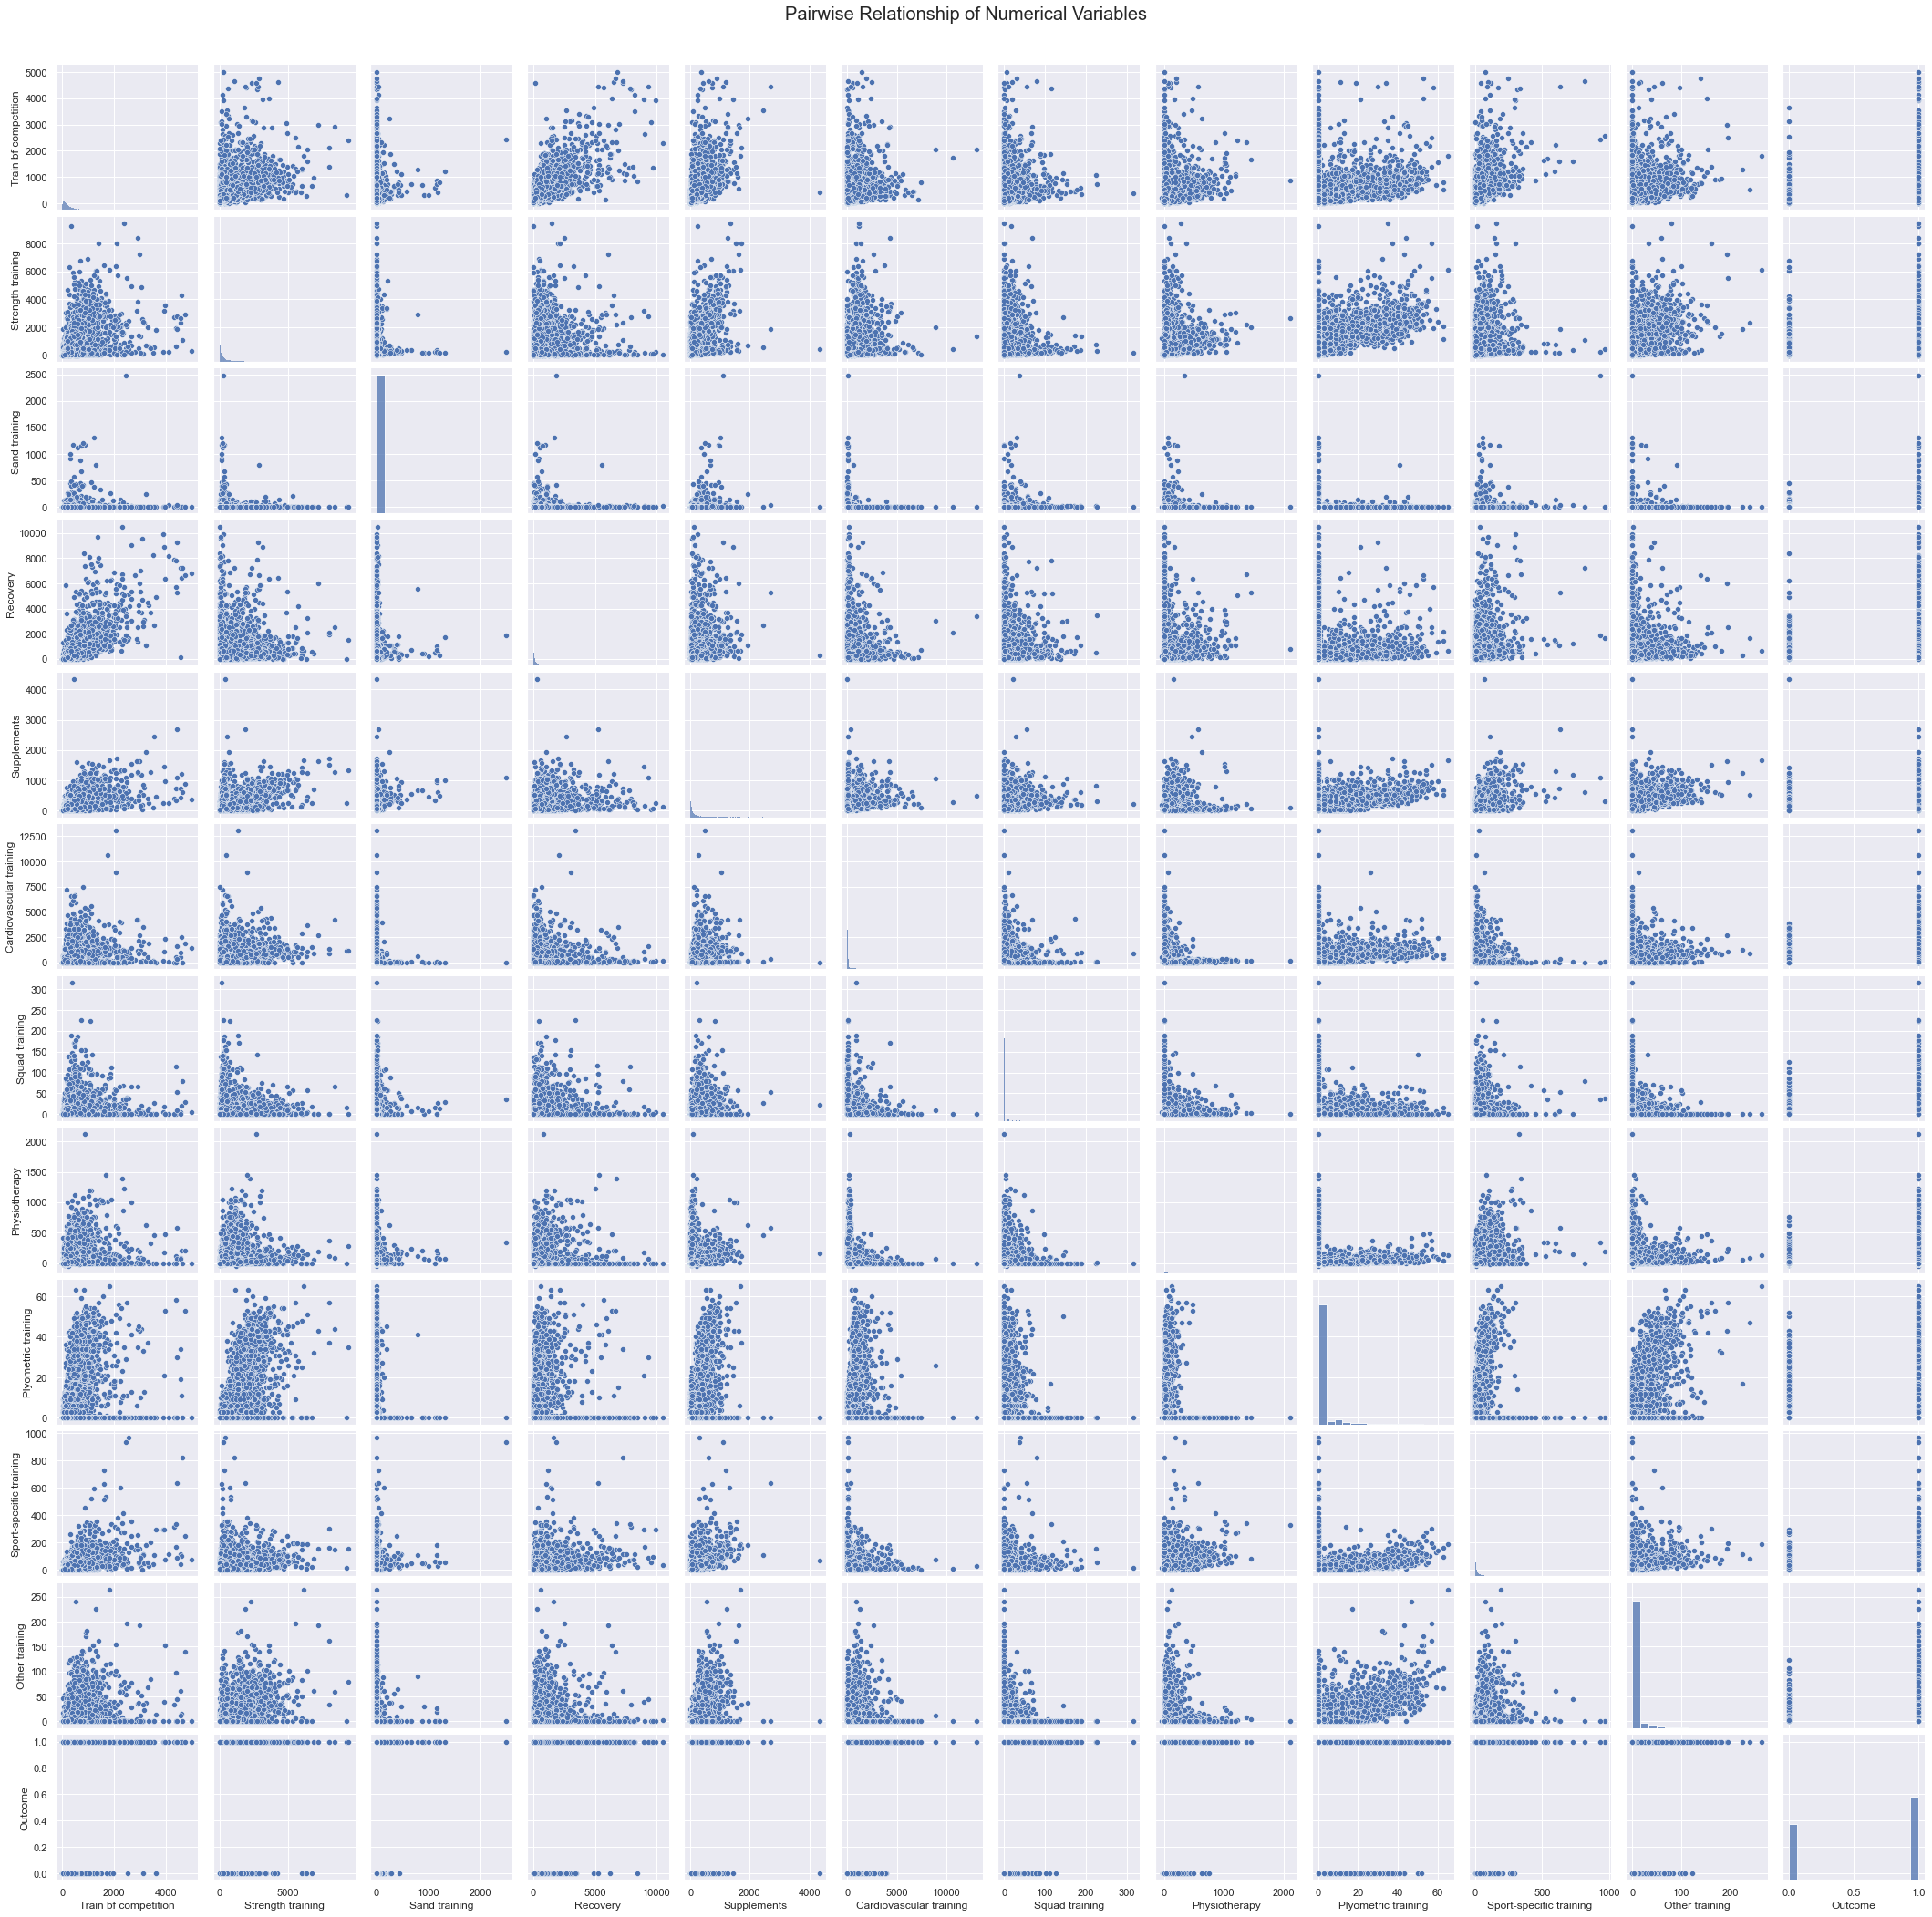

In [62]:
pw_all_features = [
      'Edition', 'Sex',
       'Education', 'Age group',
        'Income', 'Disability', 'Previous attempts',
       'Late enrollment', 'Cancelled enrollment', 'Athlete score',
       'Mental preparation', 'Train bf competition', 'Strength training',
       'Sand training', 'Recovery', 'Supplements', 'Cardiovascular training',
       'Outdoor Workout', 'Squad training', 'Physiotherapy',
       'Plyometric training', 'No coach', 'Sport-specific training',
       'Other training', 'Past injuries', 'Outcome']

pw_training_features = ['Train bf competition', 'Strength training',
       'Sand training', 'Recovery', 'Supplements', 'Cardiovascular training',
       'Squad training', 'Physiotherapy',
       'Plyometric training', 'Sport-specific training',
       'Other training','Outcome']

       

# Pairwise Relationship of All Numerical Variables
sns.set()

# Setting pairplot
sns.pairplot(df_pairwise[pw_training_features], diag_kind="hist")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

plt.show()

# <font color='#BFD72F'>Data Pre-processing</font>

In [63]:
df_pre = df_orig.copy()

In [64]:
# Check if it is ok to set double key, also AthleteID as missing values
#df_pre.set_index(['RecordID','Athlete Id'], inplace = True)
#df_pre.set_index('RecordID', inplace = True)

<font color='#BFD72F'>Data Consistency</font>

In [65]:
## Look at dataset data types, after change
df_pre.dtypes

RecordID                     int64
Competition                 object
Edition                    float64
Athlete Id                 float64
Sex                         object
Region                      object
Education                   object
Age group                   object
Income                      object
Disability                  object
Previous attempts          float64
Late enrollment             object
Cancelled enrollment        object
Athlete score              float64
Mental preparation          object
Train bf competition       float64
Strength training          float64
Sand training              float64
Recovery                   float64
Supplements                float64
Cardiovascular training    float64
Outdoor Workout             object
Squad training             float64
Physiotherapy              float64
Plyometric training        float64
No coach                    object
Sport-specific training    float64
Other training             float64
Past injuries       

<font color='#BFD72F'>Handling Incoherences | Errors</font>

In [66]:
# Treat the error in variable 'Age group', by replacing value '0' for '0-35'
df_pre['Age group'].replace('0', '0-35', inplace = True)

In [67]:
# Treat the error in variable 'Mental preparation', by replacing value 'FASE' for 'FALSE'
df_pre['Mental preparation'].replace('FASE', 'FALSE', inplace = True)


In [68]:
# Physiotherapy number of physiotherapy > count of negative values = 20
# checking from past injuries we can assume that the athletes with negative values had physioterapy sessions convert to positive
df_pre['Physiotherapy'] = abs(df_pre['Physiotherapy'])



In [69]:
#Athlete score negative values are considered positive, all values become converted to multiples of 30 and reduced to a sacale between 0 and 5
df_pre['Athlete score'] = (abs(df_pre['Athlete score'])/30).round(0)

<font color='#BFD72F'>Convertion of categorical variables</font>

For Boolean and Categorical, regarding the meaning of the variable, we convert the values accordingly:
* Competion: becomes numerical according to the importance and level of competition:
  * Local Match = 1
  * Regional Tournmant = 2
  * Federation League = 3
  * National Cup = 4
  * Continental Championship = 5
  * World Championhip = 6
  * Olimpic Game = 7
* Sex: Male = 0; Female = 1
* Region: Grouped by geographic location
* Education: order by level of education from lower to higher
* Age-group:
  * 0-35 = 1
  * 35-55 = 2
  * 55<= = 3
* Income: order by income from lower to higher
* Disability: converted False = 0; True = 1
* Late Enrollment: converted False = 0; True = 1
* Canceled Enrollment: converted False = 0; True = 1
* Mental Preparation: converted False = 0; True = 1
* Outdoor Workout: converted False = 0; True = 1
* Past injuries: converted False = 0; True = 1


In [70]:
#complete dictionary:
cleanup_nums = {"Competition": {"Local Match": 1, "Regional Tournament": 2, "Federation League": 3, "National Cup": 4, "Continental Championship": 5, "World Championship": 6, "Olympic Games": 7},
                "Sex":     {"M": 0, "F": 1},                              
                "Region": {"North America": "America", "South America": "America",  "Central America": "America", "Western Europe": "Europe", "Eastern Europe": "Europe",  "Southern Europe": "Europe", "East Asia": "Asia", "Central Asia": "Asia",  "South Asia": "Asia", "Northern Africa": "Africa",  "Southern Africa": "Africa"},
                "Education": {"Elementary school": 1, "Middle school": 2, "High school": 3, "University Degree": 4, "Post Graduate": 5},
                "Age group": {"0-35": 1, "35-55": 2, "55<=": 3},
                "Income":     {"Low": 1, "Middle-Low": 2, "Middle": 3, "Middle-High": 4, "High": 5},
                "Disability":     {False: 0, True: 1},
                "Late enrollment":     {False: 0, True: 1},
                "Cancelled enrollment":     {False: 0, True: 1},
                "Mental preparation":     {"FALSE": 0, "TRUE": 1},
                "Outdoor Workout":     {False: 0, True: 1},
                "Past injuries":     {False: 0, True: 1},
                }

In [71]:
#using dictionary for replacings
df_pre  = df_pre.replace(cleanup_nums)

df_pre.head()

,RecordID,Competition,Edition,Athlete Id,Sex,Region,Education,Age group,Income,Disability,...,Cardiovascular training,Outdoor Workout,Squad training,Physiotherapy,Plyometric training,No coach,Sport-specific training,Other training,Past injuries,Outcome
0,44141,3.0,2019.0,549337.0,0.0,Africa,3.0,1.0,3.0,0.0,...,0.0,0.0,7.0,0.0,0.0,False,1.0,0.0,0.0,0
1,78417,2.0,2021.0,631492.0,1.0,Oceania,4.0,1.0,1.0,0.0,...,118.0,0.0,0.0,0.0,0.0,False,65.0,0.0,0.0,1
2,63424,7.0,2022.0,2168833.0,0.0,Middle East,2.0,2.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,False,0.0,0.0,0.0,0
3,72391,4.0,2021.0,573153.0,0.0,Europe,2.0,1.0,1.0,0.0,...,55.0,0.0,0.0,0.0,0.0,False,3.0,0.0,0.0,0
4,46699,1.0,2019.0,606079.0,0.0,Europe,3.0,2.0,3.0,0.0,...,265.0,0.0,22.0,50.0,13.0,False,25.0,0.0,0.0,0


<font color='#BFD72F'>One-hot encoding</font>

In [72]:
df_pre['Region'].value_counts()

America        4882
Europe         4293
Asia           4035
Africa         2200
Middle East    1374
Oceania        1169
Name: Region, dtype: int64

In [73]:
#Before apply one-hot encoding handle missings in region, regarding low correlation with any other variable we simply replace by the mode "America"
df_pre.fillna({'Region': 'America'}, inplace=True)

In [74]:
# Get one hot encoding of columns 'Region'
one_hot = pd.get_dummies(df_pre.Region, prefix='Region')

# Join the encoded df
df_pre = df_pre.join(one_hot)

# Drop column as it is now encoded
df_pre = df_pre.drop('Region',axis = 1)


In [75]:
df_pre.sort_index()

,RecordID,Competition,Edition,Athlete Id,Sex,Education,Age group,Income,Disability,Previous attempts,...,Sport-specific training,Other training,Past injuries,Outcome,Region_Africa,Region_America,Region_Asia,Region_Europe,Region_Middle East,Region_Oceania
0,44141,3.0,2019.0,549337.0,0.0,3.0,1.0,3.0,0.0,0.0,...,1.0,0.0,0.0,0,1,0,0,0,0,0
1,78417,2.0,2021.0,631492.0,1.0,4.0,1.0,1.0,0.0,0.0,...,65.0,0.0,0.0,1,0,0,0,0,0,1
2,63424,7.0,2022.0,2168833.0,0.0,2.0,2.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,1,0
3,72391,4.0,2021.0,573153.0,0.0,2.0,1.0,1.0,0.0,0.0,...,3.0,0.0,0.0,0,0,0,0,1,0,0
4,46699,1.0,2019.0,606079.0,0.0,3.0,2.0,3.0,0.0,0.0,...,25.0,0.0,0.0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18050,14070,6.0,2021.0,628530.0,1.0,2.0,1.0,2.0,0.0,0.0,...,0.0,0.0,1.0,1,0,0,1,0,0,0
18051,11052,3.0,2020.0,557751.0,0.0,3.0,1.0,1.0,0.0,0.0,...,34.0,3.0,0.0,0,0,0,1,0,0,0
18052,63665,2.0,2019.0,178963.0,0.0,3.0,1.0,4.0,1.0,0.0,...,2.0,0.0,0.0,1,0,0,0,0,1,0
18053,56900,4.0,2022.0,634552.0,0.0,3.0,1.0,5.0,0.0,0.0,...,7.0,0.0,0.0,1,0,0,0,0,0,1


<font color='#BFD72F'>Data type conversion</font>

In [76]:
df_pre.dtypes

RecordID                     int64
Competition                float64
Edition                    float64
Athlete Id                 float64
Sex                        float64
Education                  float64
Age group                  float64
Income                     float64
Disability                 float64
Previous attempts          float64
Late enrollment            float64
Cancelled enrollment       float64
Athlete score              float64
Mental preparation         float64
Train bf competition       float64
Strength training          float64
Sand training              float64
Recovery                   float64
Supplements                float64
Cardiovascular training    float64
Outdoor Workout            float64
Squad training             float64
Physiotherapy              float64
Plyometric training        float64
No coach                    object
Sport-specific training    float64
Other training             float64
Past injuries              float64
Outcome             

In [77]:
# Data type casts
df_pre['Age group'] = df_pre['Age group'].astype('Int8')
df_pre['Mental preparation'] = df_pre['Mental preparation'].astype('Int8')

<font color='#BFD72F'>Outliers</font>

Removing Outliers
REVER!!! está a limpar os missing 



In [78]:
filters2 = (
    (df_pre['Train bf competition']<4400)       # (0.0, 5012.0)
    &
    (df_pre['Strength training']<7600)          # (0.0, 9438.0)
    &
    (df_pre['Sand training']<1500)              # (0.0, 2480.0)
    &        
    (df_pre['Recovery']<8700)                   # (0.0, 10483.0)
    & 
    (df_pre["Supplements"]<2800)                # (0.0, 4345.0)
    &        
    (df_pre['Cardiovascular training']<8000)    # (0.0, 13032.0)
    &
    (df_pre['Squad training']<250)              # (0.0, 316.0)
    &
    (df_pre['Physiotherapy']<1500)              # (-50.0, 2117.0) 
    &
    (df_pre['Plyometric training']<62)          # (0.0, 65.0)
    &    
    (df_pre['Sport-specific training']<900)     # (0.0, 966.0)
    &
    (df_pre['Other training']<200)              # (0.0, 264.0)
 )
df_2 = df_pre[filters2]

In [79]:
print('Percentage of data kept after removing outliers:', np.round(df_2.shape[0] / df_orig.shape[0], 4))

Percentage of data kept after removing outliers: 0.9461


In [80]:
df_pre = df_2.copy()

<font color='#BFD72F'>Missing Values</font>

In [81]:
df_pre.isna().sum()

RecordID                     0
Competition                 83
Edition                     86
Athlete Id                  87
Sex                         91
Education                   89
Age group                   99
Income                      85
Disability                  81
Previous attempts           84
Late enrollment             82
Cancelled enrollment        86
Athlete score               81
Mental preparation          73
Train bf competition         0
Strength training            0
Sand training                0
Recovery                     0
Supplements                  0
Cardiovascular training      0
Outdoor Workout             78
Squad training               0
Physiotherapy                0
Plyometric training          0
No coach                    81
Sport-specific training      0
Other training               0
Past injuries              102
Outcome                      0
Region_Africa                0
Region_America               0
Region_Asia                  0
Region_E

To fill missing values we can use the athlete id for some features as it is most likely the have similiar values

In [82]:
# for the the same Athlete Id get the same values (when missing) for the following features
columns_to_fill = ['Sex', 'Education', 'Age group', 'Income', 'Disability']

def fill_missing_values(df, columns):
  # Filter out rows without 'Athlete Id'
  df_filtered = df.dropna(subset=['Athlete Id'])

  for col in columns:
    # Sort the filtered dataframe by 'Athlete Id' to group the rows together
    # and push missing values in column to fill to the end (forward fill)
    df_filtered = df_filtered.sort_values(['Athlete Id', col])

    # Forward fill the missing values in this column within each group
    df_filtered[col] = df_filtered.groupby('Athlete Id')[col].ffill()

    # Merge the filled values back to the original dataframe
    df = df.merge(df_filtered[['RecordID', col]], on='RecordID', how='left', suffixes=('', '_filled'))

    # Replace missing values in this column with the filled values
    df[col] = df[col + '_filled'].fillna(df[col])

    # Drop the temporary column
    df = df.drop(col + '_filled', axis=1)
  return df

# Call the function to fill missing values in the specified columns

df_pre = fill_missing_values(df_pre, columns_to_fill)


* Competion: Correlated to Athlete score, Mental Preparation, Outdoor Workout, Suplements
* Edition: use 2022
* AthleteID: drop feature
* Sex: male?
* Education: Mode
* Age-group: Mode
* Income: Mode
* Disability: Mode
* Previous Attempts: 0
* Late Enrolloment: drop feature
* Cancelled Enrollment: 0
* Athlete score: Competition
* Mental preparation: Correlated with most of training features
* Train bf competition: Correlated with most of training features
* Strength training: Correlated with most of training features
* Sand training: Correlated with most of training features
* Recovery: Correlated with most of training features
* Supplements: Correlated with most of training features
* Cardiovascular training: Correlated with most of training features
* Outdoor Workout: Correlated with most of training features
* Squad training: Correlated with most of training features
* Physiotherapy: Correlated with most of training features
* Plyometric training: Correlated with most of training features
* No coach: drop feature
* Sport-specific training: Correlated with most of training features
* Other training: Correlated with most of training features
* Past injuries: 0


In [83]:
# droping features
df_pre.drop(['Athlete Id', 'Late enrollment', 'No coach'], axis=1, inplace=True)

In [84]:
# fazer função!!!
df_pre['Edition'].fillna(df_pre['Edition'].mode()[0], inplace=True)
df_pre['Sex'].fillna(df_pre['Sex'].mode()[0], inplace=True)
df_pre['Education'].fillna(df_pre['Education'].mode()[0], inplace=True)
df_pre['Age group'].fillna(df_pre['Age group'].mode()[0], inplace=True)
df_pre['Income'].fillna(df_pre['Income'].mode()[0], inplace=True)
df_pre['Disability'].fillna(df_pre['Disability'].mode()[0], inplace=True)
df_pre['Previous attempts'].fillna(df_pre['Previous attempts'].mode()[0], inplace=True)
df_pre['Cancelled enrollment'].fillna(0, inplace=True)
df_pre['Past injuries'].fillna(df_pre['Past injuries'].mode()[0], inplace=True)



#Temporary - FIX
df_pre['Competition'].fillna(1, inplace=True)
df_pre['Athlete score'].fillna(df_pre['Athlete score'].mode()[0], inplace=True)
df_pre['Mental preparation'].fillna(df_pre['Mental preparation'].mode()[0], inplace=True)
df_pre['Outdoor Workout'].fillna(df_pre['Outdoor Workout'].mode()[0], inplace=True)




In [85]:
df_pre['Athlete score'].value_counts()

0.0    9312
1.0    3707
2.0    3125
3.0     369
4.0     350
5.0     218
Name: Athlete score, dtype: int64

In [86]:
#Competition Correlated to: Athlete Score, Mental Preparation

In [87]:
df_pre.isna().sum()

RecordID                   0
Competition                0
Edition                    0
Sex                        0
Education                  0
Age group                  0
Income                     0
Disability                 0
Previous attempts          0
Cancelled enrollment       0
Athlete score              0
Mental preparation         0
Train bf competition       0
Strength training          0
Sand training              0
Recovery                   0
Supplements                0
Cardiovascular training    0
Outdoor Workout            0
Squad training             0
Physiotherapy              0
Plyometric training        0
Sport-specific training    0
Other training             0
Past injuries              0
Outcome                    0
Region_Africa              0
Region_America             0
Region_Asia                0
Region_Europe              0
Region_Middle East         0
Region_Oceania             0
dtype: int64

<font color='#BFD72F'>Data Mormalization</font>


In [88]:
df_pre.set_index('RecordID', inplace=True)

In [89]:
df_pre.columns

Index(['Competition', 'Edition', 'Sex', 'Education', 'Age group', 'Income',
       'Disability', 'Previous attempts', 'Cancelled enrollment',
       'Athlete score', 'Mental preparation', 'Train bf competition',
       'Strength training', 'Sand training', 'Recovery', 'Supplements',
       'Cardiovascular training', 'Outdoor Workout', 'Squad training',
       'Physiotherapy', 'Plyometric training', 'Sport-specific training',
       'Other training', 'Past injuries', 'Outcome', 'Region_Africa',
       'Region_America', 'Region_Asia', 'Region_Europe', 'Region_Middle East',
       'Region_Oceania'],
      dtype='object')

In [90]:
minmax_features = ['Competition', 'Edition'
        #, 'Sex'
        , 'Education', 'Age group', 'Income'
       #, 'Disability'
       , 'Previous attempts'
       #, 'Cancelled enrollment'
       , 'Athlete score'
       #, 'Mental preparation'
       , 'Train bf competition',
       'Strength training', 'Sand training', 'Recovery', 'Supplements',
       'Cardiovascular training'
       #, 'Outdoor Workout'
       , 'Squad training',
       'Physiotherapy', 'Plyometric training', 'Sport-specific training',
       'Other training'
       #, 'Past injuries'
       #, 'Outcome', 'Region_Africa',
       #'Region_America', 'Region_Asia', 'Region_Europe', 'Region_Middle East',
       #'Region_Oceania'
       ]

In [91]:
df_minmax = df_pre.copy()

In [92]:
# Use MinMaxScaler to scale the data
scaler = MinMaxScaler()
scaled_feat = scaler.fit_transform(df_minmax[minmax_features])
scaled_feat

array([[0.33333333, 0.        , 0.5       , ..., 0.        , 0.00137174,
        0.        ],
       [0.16666667, 0.66666667, 0.75      , ..., 0.        , 0.08916324,
        0.        ],
       [1.        , 1.        , 0.25      , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.16666667, 0.        , 0.5       , ..., 0.        , 0.00274348,
        0.        ],
       [0.5       , 1.        , 0.5       , ..., 0.        , 0.00960219,
        0.        ],
       [0.66666667, 0.66666667, 0.75      , ..., 0.        , 0.0521262 ,
        0.        ]])

In [93]:
print("Parameters fitted:\n", scaler.data_min_, "\n", scaler.data_max_)


Parameters fitted:
 [1.000e+00 2.019e+03 1.000e+00 1.000e+00 1.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00] 
 [7.000e+00 2.022e+03 5.000e+00 3.000e+00 5.000e+00 6.000e+00 5.000e+00
 4.396e+03 7.240e+03 1.316e+03 8.397e+03 2.438e+03 7.447e+03 2.270e+02
 1.449e+03 6.000e+01 7.290e+02 1.960e+02]


In [94]:
df_minmax[minmax_features] = scaled_feat
df_minmax.head(5)

,Competition,Edition,Sex,Education,Age group,Income,Disability,Previous attempts,Cancelled enrollment,Athlete score,...,Sport-specific training,Other training,Past injuries,Outcome,Region_Africa,Region_America,Region_Asia,Region_Europe,Region_Middle East,Region_Oceania
RecordID,,,,,,,,,,,,,,,,,,,,,
44141,0.333333,0.000000,0.0,0.50,0.0,0.5,0.0,0.0,1.0,0.0,...,0.001372,0.0,0.0,0,1,0,0,0,0,0
78417,0.166667,0.666667,1.0,0.75,0.0,0.0,0.0,0.0,0.0,0.4,...,0.089163,0.0,0.0,1,0,0,0,0,0,1
63424,1.000000,1.000000,0.0,0.25,0.5,0.5,0.0,0.0,1.0,0.0,...,0.000000,0.0,0.0,0,0,0,0,0,1,0
72391,0.500000,0.666667,0.0,0.25,0.0,0.0,0.0,0.0,1.0,0.2,...,0.004115,0.0,0.0,0,0,0,0,1,0,0
46699,0.000000,0.000000,0.0,0.50,0.5,0.5,0.0,0.0,0.0,0.4,...,0.034294,0.0,0.0,0,0,0,0,1,0,0


In [95]:
# Checking max and min of minmaxed variables
df_minmax[minmax_features].describe().round(2)

,Competition,Edition,Education,Age group,Income,Previous attempts,Athlete score,Train bf competition,Strength training,Sand training,Recovery,Supplements,Cardiovascular training,Squad training,Physiotherapy,Plyometric training,Sport-specific training,Other training
count,17081.00,17081.00,17081.00,17081.00,17081.00,17081.00,17081.00,17081.00,17081.00,17081.00,17081.00,17081.00,17081.00,17081.00,17081.00,17081.00,17081.00,17081.00
mean,0.32,0.55,0.45,0.15,0.52,0.03,0.16,0.06,0.07,0.00,0.04,0.05,0.04,0.02,0.02,0.04,0.03,0.02
std,0.28,0.40,0.19,0.24,0.38,0.08,0.22,0.07,0.09,0.02,0.07,0.07,0.06,0.05,0.06,0.12,0.05,0.07
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.17,0.00,0.25,0.00,0.25,0.00,0.00,0.02,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.33,0.67,0.50,0.00,0.50,0.00,0.00,0.04,0.03,0.00,0.01,0.03,0.01,0.00,0.00,0.00,0.01,0.00
75%,0.50,1.00,0.50,0.50,1.00,0.00,0.20,0.08,0.08,0.00,0.04,0.07,0.04,0.01,0.02,0.00,0.04,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


# <font color='#BFD72F'>Model</font>

In [96]:
# y array - target only
y=df_pre['Outcome'].values
# X array - drop target
X= df_pre.drop(['Outcome'],axis=1).values

In [97]:
# Split Train into Train and Validate Sets
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
# Size of our newly split datasets 
print('Train size: %i' % x_train.shape[0])
print('Validation size: %i' % x_val.shape[0])

Train size: 13664
Validation size: 3417


In [329]:
#scaling

# RobustScaler
robust_scaler = RobustScaler()
x_train_robust_scaled = robust_scaler.fit_transform(x_train)
x_test_robust_scaled = robust_scaler.transform(x_val)

# StandardScaler
standard_scaler = StandardScaler()
x_train_standard_scaled = standard_scaler.fit_transform(x_train)
x_test_standard_scaled = standard_scaler.transform(x_val)

# MinMaxScaler
minmax_scaler = MinMaxScaler()
x_train_minmax_scaled = minmax_scaler.fit_transform(x_train)
x_test_minmax_scaled = minmax_scaler.transform(x_val)

<font color='#BFD72F'>XgBoost</font>

In [100]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train, y_train.ravel())
print('Train:', xgb_model.score(x_train, y_train.ravel()))
print('Test:',xgb_model.score(x_val, y_val))
print(); print(xgb_model)

Train: 0.9564549180327869
Test: 0.8609891717881182

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


In [101]:
y_predXGB = xgb_model.predict(x_val)
f1 = f1_score(y_val,y_predXGB)
print ('Test F1 for XgBoost Classifier:', f1)
print(metrics.classification_report(y_val, y_predXGB))

Test F1 for XgBoost Classifier: 0.8873606829499643
              precision    recall  f1-score   support

           0       0.88      0.76      0.82      1403
           1       0.85      0.93      0.89      2014

    accuracy                           0.86      3417
   macro avg       0.87      0.85      0.85      3417
weighted avg       0.86      0.86      0.86      3417



In [102]:
# Define the parameter grid
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
}

In [103]:
xgb_model = xgb.XGBClassifier()
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=5)
# Perform grid search
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=Non

In [104]:
# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [105]:
# Evaluate the best model on the validation set
xgb2_pred = best_model.predict(x_val)
accuracy = accuracy_score(y_val, y_predXGB)
print("Best Model Accuracy:", accuracy)

Best Model Accuracy: 0.8609891717881182


In [106]:
XGB2 = xgb.XGBClassifier()
XGB2.fit(x_train, y_train.ravel())
print('Train:', XGB2.score(x_train, y_train.ravel()))
print('Test:',XGB2.score(x_val, y_val))
print(); print(XGB2)

Train: 0.9564549180327869
Test: 0.8609891717881182

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


In [107]:
xgb_score = f1_score(y_val,xgb2_pred)
xgb2_accuracy = accuracy_score(y_val, xgb2_pred)
print ('Test F1 for XgBoost Classifier:', xgb_score)
print(metrics.classification_report(y_val, xgb2_pred))

Test F1 for XgBoost Classifier: 0.8929663608562692
              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1403
           1       0.85      0.94      0.89      2014

    accuracy                           0.87      3417
   macro avg       0.88      0.85      0.86      3417
weighted avg       0.87      0.87      0.86      3417



<font color='#BFD72F'>Neural Network</font>

In [108]:
# Neural Network (Multi-Layer Perceptron)
nn_model = MLPClassifier()
nn_model.fit(x_train_robust_scaled, y_train)
nn_predictions = nn_model.predict(x_test_robust_scaled)
nn_accuracy = accuracy_score(y_val, nn_predictions)


B:\Utilities\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


<font color='#BFD72F'>Naive Bayes</font>

In [109]:
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(x_train_minmax_scaled, y_train)
nb_pred = nb_model.predict(x_test_minmax_scaled)
nb_accuracy = accuracy_score(y_val, nb_pred)

<font color='#BFD72F'>Random Forest</font>

In [110]:
#random forest
rf_model = RandomForestClassifier()
rf_model.fit(x_train_minmax_scaled, y_train)
rf_pred = rf_model.predict(x_test_minmax_scaled)
rf_accuracy = accuracy_score(y_val, rf_pred)

<font color='#BFD72F'>Decision Tree</font>

In [111]:
#decision tree
tree_model = DecisionTreeClassifier()
tree_model.fit(x_train_robust_scaled, y_train)
tree_pred = tree_model.predict(x_test_robust_scaled)
tree_accuracy = accuracy_score(y_val, tree_pred)

In [112]:
# Print the accuracies of different models
print("Decision Tree Accuracy:", tree_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Neural Network Accuracy:", nn_accuracy)

Decision Tree Accuracy: 0.8080187298800117
Random Forest Accuracy: 0.8715247292947029
Naive Bayes Accuracy: 0.8009950248756219
Neural Network Accuracy: 0.855428738659643


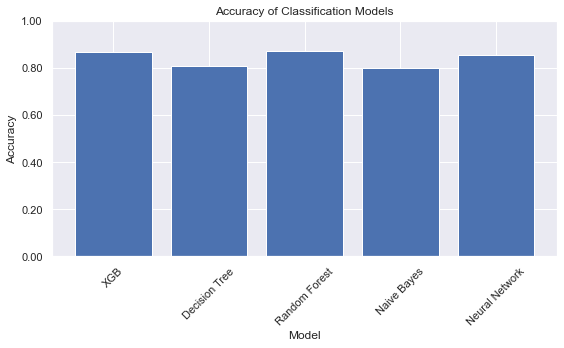

In [113]:
#create names to use in the plot afterwards
model_names= ['XGB','Decision Tree', 'Random Forest', 'Naive Bayes', 'Neural Network']
accuracies = [xgb2_accuracy,tree_accuracy,rf_accuracy,nb_accuracy,nn_accuracy]

#define the plot with model names and their accuracies
plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Classification Models')
plt.ylim(0, 1)  # Set the y-axis limits from 0 to 1
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.gca().yaxis.set_major_formatter('{:.2f}'.format)
plt.tight_layout()
plt.show()

# <font color='#BFD72F'>Kaggle Submission</font>

In [304]:
#import test dataset
df_test = pd.read_csv("test.csv")

In [305]:
# Check if it is ok to set double key, also AthleteID as missing values
df_test.set_index('RecordID', inplace = True)

In [306]:
## Look at dataset data types, after change
df_test.dtypes

Competition                 object
Edition                      int64
Athlete Id                   int64
Sex                         object
Region                      object
Education                   object
Age group                   object
Income                      object
Disability                    bool
Previous attempts            int64
Late enrollment               bool
Cancelled enrollment          bool
Athlete score              float64
Mental preparation            bool
Train bf competition       float64
Strength training          float64
Sand training              float64
Recovery                   float64
Supplements                float64
Cardiovascular training    float64
Outdoor Workout               bool
Squad training             float64
Physiotherapy              float64
Plyometric training        float64
No coach                      bool
Sport-specific training    float64
Other training             float64
Past injuries                 bool
dtype: object

In [307]:
# Treat the error in variable 'Age group', by replacing value '0' for '0-35'
df_test['Age group'].replace('0', '0-35', inplace = True)
# Treat the error in variable 'Mental preparation', by replacing value 'FASE' for 'FALSE'
df_test['Mental preparation'].replace('FASE', 'FALSE', inplace = True)
# Physiotherapy number of physiotherapy > count of negative values = 20
# checking from past injuries we can assume that the athletes with negative values had physioterapy sessions convert to positive
df_test['Physiotherapy'] = abs(df_test['Physiotherapy'])
#Athlete score negative values are considered positive, all values become converted to multiples of 30 and reduced to a sacale between 0 and 5
df_test['Athlete score'] = (abs(df_test['Athlete score'])/30).round(0)


In [308]:
#complete dictionary:
cleanup_nums = {"Competition": {"Local Match": 1, "Regional Tournament": 2, "Federation League": 3, "National Cup": 4, "Continental Championship": 5, "World Championship": 6, "Olympic Games": 7},
                "Sex":     {"M": 0, "F": 1},                              
                "Region": {"North America": "America", "South America": "America",  "Central America": "America", "Western Europe": "Europe", "Eastern Europe": "Europe",  "Southern Europe": "Europe", "East Asia": "Asia", "Central Asia": "Asia",  "South Asia": "Asia", "Northern Africa": "Africa",  "Southern Africa": "Africa"},
                "Education": {"Elementary school": 1, "Middle school": 2, "High school": 3, "University Degree": 4, "Post Graduate": 5},
                "Age group": {"0-35": 1, "35-55": 2, "55<=": 3},
                "Income":     {"Low": 1, "Middle-Low": 2, "Middle": 3, "Middle-High": 4, "High": 5},
                "Disability":     {False: 0, True: 1},
                "Late enrollment":     {False: 0, True: 1},
                "Cancelled enrollment":     {False: 0, True: 1},
                "Mental preparation":     {"FALSE": 0, "TRUE": 1},
                "Outdoor Workout":     {False: 0, True: 1},
                "Past injuries":     {False: 0, True: 1},
                }

In [309]:
#using dictionary for replacings
df_test  = df_test.replace(cleanup_nums)

df_test.head()

,Competition,Edition,Athlete Id,Sex,Region,Education,Age group,Income,Disability,Previous attempts,...,Supplements,Cardiovascular training,Outdoor Workout,Squad training,Physiotherapy,Plyometric training,No coach,Sport-specific training,Other training,Past injuries
RecordID,,,,,,,,,,,,,,,,,,,,,
89269,2,2022,1526770,1,Africa,2,2,3,0,0,...,35.0,102.0,0,7.0,0.0,12.0,False,4.0,0.0,1
89144,4,2021,481024,1,America,3,2,2,0,0,...,22.0,69.0,0,0.0,0.0,0.0,False,0.0,0.0,0
39423,4,2022,464780,0,Europe,3,1,3,0,0,...,20.0,127.0,0,0.0,0.0,0.0,False,2.0,0.0,0
35614,2,2019,2415414,1,America,4,1,2,0,0,...,152.0,94.0,0,1.0,0.0,0.0,False,33.0,0.0,0
55787,1,2022,372345,0,Middle East,3,1,4,0,0,...,162.0,564.0,1,5.0,6.0,3.0,False,5.0,1.0,1


In [310]:
df_test['Region'].value_counts()

America        2077
Europe         1848
Asia           1723
Africa         1002
Middle East     574
Oceania         514
Name: Region, dtype: int64

In [311]:
#Before apply one-hot encoding handle missings in region, regarding low correlation with any other variable we simply replace by the mode "America"
df_test.fillna({'Region': 'America'}, inplace=True)

In [312]:
# Get one hot encoding of columns 'Region'
one_hot = pd.get_dummies(df_test.Region, prefix='Region')

# Join the encoded df
df_test = df_test.join(one_hot)

# Drop column as it is now encoded
df_test = df_test.drop('Region',axis = 1)


In [313]:
df_test.sort_index()

,Competition,Edition,Athlete Id,Sex,Education,Age group,Income,Disability,Previous attempts,Late enrollment,...,No coach,Sport-specific training,Other training,Past injuries,Region_Africa,Region_America,Region_Asia,Region_Europe,Region_Middle East,Region_Oceania
RecordID,,,,,,,,,,,,,,,,,,,,,
10007,1,2019,605394,0,3,1,5,0,0,0,...,False,1.0,0.0,0,1,0,0,0,0,0
10027,5,2022,692534,0,2,1,1,0,0,0,...,False,26.0,0.0,1,0,1,0,0,0,0
10032,3,2021,2312809,0,2,2,5,0,0,0,...,False,16.0,0.0,1,0,0,1,0,0,0
10064,3,2022,645499,0,4,1,2,0,0,0,...,False,5.0,0.0,1,0,1,0,0,0,0
10069,1,2021,617678,1,3,1,5,0,0,0,...,False,16.0,0.0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99969,1,2021,101634,0,1,1,1,0,0,0,...,False,2.0,0.0,1,0,0,0,1,0,0
99973,5,2022,637123,0,3,1,5,0,0,0,...,False,34.0,0.0,1,0,1,0,0,0,0
99982,5,2021,612327,0,3,1,3,0,0,0,...,False,24.0,1.0,1,0,0,0,0,1,0


In [314]:
df_test.dtypes

Competition                  int64
Edition                      int64
Athlete Id                   int64
Sex                          int64
Education                    int64
Age group                    int64
Income                       int64
Disability                   int64
Previous attempts            int64
Late enrollment              int64
Cancelled enrollment         int64
Athlete score              float64
Mental preparation            bool
Train bf competition       float64
Strength training          float64
Sand training              float64
Recovery                   float64
Supplements                float64
Cardiovascular training    float64
Outdoor Workout              int64
Squad training             float64
Physiotherapy              float64
Plyometric training        float64
No coach                      bool
Sport-specific training    float64
Other training             float64
Past injuries                int64
Region_Africa                uint8
Region_America      

In [315]:
# droping features
df_test.drop(['Athlete Id', 'Late enrollment', 'No coach'], axis=1, inplace=True)

In [316]:
df_pre.head()

,Competition,Edition,Sex,Education,Age group,Income,Disability,Previous attempts,Cancelled enrollment,Athlete score,...,Sport-specific training,Other training,Past injuries,Outcome,Region_Africa,Region_America,Region_Asia,Region_Europe,Region_Middle East,Region_Oceania
RecordID,,,,,,,,,,,,,,,,,,,,,
44141,3.0,2019.0,0.0,3.0,1,3.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0,1,0,0,0,0,0
78417,2.0,2021.0,1.0,4.0,1,1.0,0.0,0.0,0.0,2.0,...,65.0,0.0,0.0,1,0,0,0,0,0,1
63424,7.0,2022.0,0.0,2.0,2,3.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,1,0
72391,4.0,2021.0,0.0,2.0,1,1.0,0.0,0.0,1.0,1.0,...,3.0,0.0,0.0,0,0,0,0,1,0,0
46699,1.0,2019.0,0.0,3.0,2,3.0,0.0,0.0,0.0,2.0,...,25.0,0.0,0.0,0,0,0,0,1,0,0


In [317]:
df_test.describe().round(2)

,Competition,Edition,Sex,Education,Age group,Income,Disability,Previous attempts,Cancelled enrollment,Athlete score,...,Plyometric training,Sport-specific training,Other training,Past injuries,Region_Africa,Region_America,Region_Asia,Region_Europe,Region_Middle East,Region_Oceania
count,7738.00,7738.00,7738.00,7738.00,7738.00,7738.00,7738.00,7738.00,7738.00,7738.00,...,7738.00,7738.00,7738.00,7738.00,7738.00,7738.00,7738.00,7738.00,7738.00,7738.00
mean,2.95,2020.64,0.45,2.76,1.32,3.11,0.10,0.16,0.18,0.78,...,2.48,21.75,4.09,0.54,0.13,0.27,0.22,0.24,0.07,0.07
std,1.69,1.22,0.50,0.76,0.48,1.51,0.29,0.47,0.38,1.06,...,7.50,42.60,13.86,0.50,0.34,0.44,0.42,0.43,0.26,0.25
min,1.00,2019.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2.00,2019.00,0.00,2.00,1.00,2.00,0.00,0.00,0.00,0.00,...,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,3.00,2021.00,0.00,3.00,1.00,3.00,0.00,0.00,0.00,0.00,...,0.00,10.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,4.00,2022.00,1.00,3.00,2.00,5.00,0.00,0.00,0.00,1.00,...,0.00,28.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00
max,7.00,2022.00,1.00,5.00,3.00,5.00,1.00,5.00,1.00,5.00,...,89.00,2134.00,387.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [318]:
# fazer função!!!
df_test['Edition'].fillna(df_test['Edition'].mode()[0], inplace=True)
df_test['Sex'].fillna(df_test['Sex'].mode()[0], inplace=True)
df_test['Education'].fillna(df_test['Education'].mode()[0], inplace=True)
df_test['Age group'].fillna(df_test['Age group'].mode()[0], inplace=True)
df_test['Income'].fillna(df_test['Income'].mode()[0], inplace=True)
df_test['Disability'].fillna(df_test['Disability'].mode()[0], inplace=True)
df_test['Previous attempts'].fillna(df_test['Previous attempts'].mode()[0], inplace=True)
df_test['Cancelled enrollment'].fillna(0, inplace=True)
df_test['Past injuries'].fillna(df_test['Past injuries'].mode()[0], inplace=True)



#Temporary - FIX
df_test['Competition'].fillna(1, inplace=True)
df_test['Athlete score'].fillna(df_test['Athlete score'].mode()[0], inplace=True)
df_test['Mental preparation'].fillna(df_test['Mental preparation'].mode()[0], inplace=True)
df_test['Outdoor Workout'].fillna(df_test['Outdoor Workout'].mode()[0], inplace=True)


In [296]:
#predict using xgb2
#y_predXGB = XGB2.predict(X_test) 

In [343]:
#scaling

# RobustScaler
robust_scaler = RobustScaler()
x_train_robust_scaled = robust_scaler.fit_transform(x_train)
x_test_robust_scaled = robust_scaler.transform(df_test)
df_test_robust_scaled =pd.DataFrame(x_test_robust_scaled, columns=df_test.columns)
# StandardScaler
standard_scaler = StandardScaler()
x_train_standard_scaled = standard_scaler.fit_transform(x_train)
x_test_standard_scaled = standard_scaler.transform(df_test)
df_test_standard =pd.DataFrame(x_test_standard_scaled, columns=df_test.columns)
# MinMaxScaler
minmax_scaler = MinMaxScaler()
x_train_minmax_scaled = minmax_scaler.fit_transform(x_train)
x_test_minmax_scaled = minmax_scaler.transform(df_test)
df_test_minmax = pd.DataFrame(x_test_minmax_scaled, columns=df_test.columns)

In [341]:
#submission_df scaled
predictions = rf_model.predict(df_test_minmax)
submission_df_scaled = pd.DataFrame({'RecordID': df_test.index, 'outcome': predictions})
submission_df_scaled.set_index('RecordID', inplace=True)

In [344]:
#create submission df_notscaled
submission_df = pd.DataFrame({'Outcome': y_predXGB}, index=X_test.index)

In [137]:
print(submission_df.columns)

Index(['outcome'], dtype='object')


In [342]:
#submission
submission_df.to_csv('sample_submission.csv')

In [ ]:
#submission scaled
submission_df_scaled.to_csv('sample_submission.csv')